In [12]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd

In [13]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5/'#'/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5/'
eq_list = os.listdir(root)

In [25]:
window = 10000 
df = pd.DataFrame({'5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})
counts = pd.DataFrame({'5.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '7.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '7.4':[0, 0, 0, 0, 0, 0, 0, 0]})

aad = pd.DataFrame({'5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})

ad = pd.DataFrame({'5.0':[[], [], [], [], [], [], [], []],
                   '5.3':[[], [], [], [], [], [], [], []],
                   '5.6':[[], [], [], [], [], [], [], []],
                   '5.9':[[], [], [], [], [], [], [], []],
                   '6.2':[[], [], [], [], [], [], [], []],
                   '6.5':[[], [], [], [], [], [], [], []],
                   '6.8':[[], [], [], [], [], [], [], []],
                   '7.1':[[], [], [], [], [], [], [], []],
                   '7.4':[[], [], [], [], [], [], [], []]})

In [26]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-06-26"), endtime=UTCDateTime("2020-06-26"), minlongitude=-179, maxlongitude=-145, minlatitude=42, maxlatitude=71, minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5_catalog.xml')
dists = []

In [27]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
        

In [22]:
mags = []
for e in cat_with_data:
    mags.append(e.magnitudes[0].mag)

In [24]:
max(mags)

7.5

In [28]:
def round_eq_mag(no, interval, start = 5, stop = 7.5):
    options = np.arange(start, stop, interval)
    return options[int((no-start)//interval)]

In [29]:
eq_no = 0
for eq_name in eq_with_data:
    print(str(eq_no) + ' out of '+ str(len(eq_with_data)))# find matching cat event:
    eq_no += 1
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    rounded_eq_mag = round_eq_mag(eq_mag, 0.3)
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    data.interpolate(100, 'lanczos', a = 20)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')

    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
    n_records = 0
    sampling_rate = 100 # get this from tr.stats.sampling_rate
    # sensor_types = self.data_stats['sensor_types'] for automated OOP
    
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
        if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():# and int(data[i].stats.sampling_rate) == 100:  # only use vertical components at stations with a pick
            try:
                tr = data[i].copy()
                tr.remove_response(inv)
                pick = picks[tr_name]
                pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))
                print(pick_samples)
                #snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples//2:500+pick_samples//2]))
                snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))
                sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
                sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude
                tr.filter('bandpass', freqmin=0.1, freqmax = 3) 
                distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110 # 2D for now...
                if distance < 200 and snr>10: 
                    dists.append(distance)
                    print(distance)

                    displ = tr.integrate()
                    abs_displ = abs(displ.data) # find absolute of trace
                    sum_abs_displ = df[eq_mag_str][int(distance//25)]
                    window = int(100 * tr.stats.sampling_rate)

                    if abs_displ[pick_samples] < 0.001:
                        sum_abs_displ =  sum_abs_displ + abs_displ[pick_samples:pick_samples+window] # calculate aad for 10000 samples after p wave arrival
                        current = ad[eq_mag_str][int(distance//25)]
                        current.append(abs_displ[pick_samples:pick_samples+window])
                        df[eq_mag_str][int(distance//25)] = sum_abs_displ
                        ad[eq_mag_str][int(distance//25)]= current
                        counts[eq_mag_str][int(distance//25)] = counts[str(np.floor(eq_mag))][int(distance//25)]  + 1
            except:
                continue
            

0 out of 1026
1 out of 1026
2 out of 1026
3 out of 1026
36850
85.4877452846
32675
126.679706309
32450
88.9066638464
32807
139.103253791
31577
20.9728788925
32263
86.3450944212
32912
25.4067342901
32255
24.3383680772
32429
33183
32770
4 out of 1026
5 out of 1026
35127
163.8654295
20243
20781
31916
99.4055223897
31997
57.1817945249
22046
34100
6 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31723
31578
88.2245843572
7 out of 1026
8 out of 1026
9 out of 1026
32435
32409
34497
114.478469115
10 out of 1026
32000
123.335010934
11 out of 1026
32351
34393
32239
32077
32161
12 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32553
137.655336723
32281
139.46725269
13 out of 1026
32353
160.798158024
32119
14 out of 1026
31388
79.008816122
31954
136.317869588
31995
112.532391507
31331
31277
71.3189918044
15 out of 1026
32177
160.992472494
22590
189.66558444
30923
42.3315817092
31588
23025
33120
197.506460011
31591
70.1099003351
23535
30903
34100
34100
22947
22947
32276
107.844466579
22219
31699
101.493053895
22475
31796
123.181354871
22275
175.429949327
23401
31071
16 out of 1026
31353
78.4140837918
17 out of 1026
32680
167.057434944
32564
136.656283137
18 out of 1026
19 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31994
108.909601146
31811
110.833050725
20 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34729
21 out of 1026
22 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31884
102.655114528
31790
104.605394588
23 out of 1026
35358
159.727696574
24 out of 1026
32066
70.6470121104
34103
32536
128.581268677
32144
64.3671878746
25 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32599
155.067532865
26 out of 1026
34300
174.297717579
32932
121.233637581
34255
32323
71.5068699653
32359
76.2866427812
32603
76.8181835849
31689
76.6695652541
27 out of 1026
28 out of 1026
32151
149.258711806
29 out of 1026
31549
31288
30 out of 1026
31911
117.33596259
31656
31 out of 1026
32 out of 1026
34805
33018
40.4972510795
32282
111.254157941
33015
159.539238443
32236
97.0481729209
32346
129.709015387
34809
33 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34101
34 out of 1026
33560
129.451652233
32556
130.113305523
28338
32575
112.159519049
28834
31897
56.4485900256
28051
110.264201707
33312
110.741538289
33483
112.066566503
32434
35 out of 1026
36 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32507
182.624056327
32055
126.068248497
32200
150.994774262
31731
124.114388956
32240
157.124941097
32594
162.313502547
31708
104.690207194
32103
151.942502747
32479
154.517037068
32123
159.812750074
31941
142.876339341
31699
102.146567365
32106
158.120165364
31735
116.12335239
32122
159.825322746
32267
157.822405784
32115
154.833543324
32222
153.423189929
32182
149.346184066
31857
116.073649792
32058
145.55515894
32551
174.092976944
32116
142.467592513
29997
31864
119.945606518
31859
122.882802754
31481
102.656146608
31969
124.829382771
31937
116.010399383
32049
121.705885301
31440
32006
139.505001197
32244
173.401087798
32054
142.296765499
32074
142.437109535
32192
135.15854303
32279
146.192770925
32056
145.579249197
32059
145.755967937
31985
123.580918306
31152
66.3694570276
31325
86.0433456915
30401
20.0352135623
31474
92.3895268361
32059
142.207726492
31078
72.2580655691
34396
32244
149.427356127
31218
68.540758786
31711
121.247024005
31295
78.3481569261
32438
31518
92.7307191851


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31484
90.1651059889
31595
92.1118798419
40 out of 1026
41 out of 1026
42 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


43 out of 1026
44 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31958
120.156867704
31994
122.191016842
45 out of 1026
32304
31276
65.7032394102
46 out of 1026
32531
163.846098519
34214
34214
32333
132.858589106
32045
113.424132146
33531
27184
184.960193366
30584
22.7080757364
47 out of 1026
48 out of 1026
32065
49 out of 1026
32058
117.794786459
50 out of 1026
32058
122.590516517
51 out of 1026
52 out of 1026
31932
131.382652162
30705
28.5315700584
46807
32495
162.937029831
53 out of 1026
40376
74.4317072342
54 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31182
81.3140491292
31194
83.4140509627
55 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31846
95.6662084472
31688
97.2757023825
56 out of 1026
31975
89.2862275438
31120
71.9894633837
31974
33461
31170
39.0079247974
57 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34121
58 out of 1026
59 out of 1026
32395
167.776061844
60 out of 1026
61 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


62 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32058
101.854516783
31934
103.95614876
63 out of 1026
32285
125.423459165
64 out of 1026
65 out of 1026
32483
58.0453750957
32823
126.68925807
32439
97.1985499598
32557
147.651234426
66 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHE_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHN_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHZ_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: GE_MORC__HHE_D: Warning: Number of blockettes in fixed he

31610
101.508775409
32066
129.933211093
32066
129.933211093
34128
31532
76.4610387714
31835
105.671498712
33242
67 out of 1026
68 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32839
163.299548648
32481
165.033308305
69 out of 1026
70 out of 1026
32118
148.674474023
31193
55.9295484069
71 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32466
144.66150311
32330
146.25261665
72 out of 1026
32051
113.672092494
31108
74.7166326348
30697
33.8110906361
32111
107.629193912
73 out of 1026
32618
32495
35012
34648
74 out of 1026
25793
75 out of 1026
76 out of 1026
31590
102.315289147
31323
84.5744097467
31753
123.45911635
31971
31881
137.227836163
30827
47.0094305442
32296
150.852962079
31679
98.9981899457
32147
108.102333766
32014
127.537955584
31475
86.4849073538
31269
59.8790544431
31659
32481
168.994695601
31851
127.773321942
31545
97.180418115
31873
113.114286061
31854
31615
80.0004053615
31832
114.169809799
31860
108.298941828
31104
44.7290994794
31969
125.992899899
31544
73.6059252574
31718
77 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


48410
32212
132.657780371
31272
45.9053947374
78 out of 1026
79 out of 1026
80 out of 1026
81 out of 1026
30846


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31591
74.4061531327
32066
93.9205960053
31131
62.7085369627
32463
123.069496907


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32409
102.460963635
82 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31764
105.214568109
31909
106.882252133
83 out of 1026
35395
171.744653708
84 out of 1026
31029
31402
82.6247720632
31606
104.640003373
31344
92.2065202304
30824
26.7614272205
32220
133.499282013
32517
123.720483852
32291
136.784263008
30495
31079
41.6110763987
31301
31043
71.2595061588
30779
31290
66.2712210773
31075
67.7823623814
31566
84.8649224724
31610
122.481503363
32388
124.066344275
32373
31810
31652
101.662582438
32057
121.89125737
31438
31182
64.300604204
31046
54.0080788864
31376
71.7313312812
31477
102.069005335
31766
113.621036872
31939
119.956924866
34201
30707
31248
81.0840211756
32226
123.602729806
31317
78.8460228998
32217
125.22682582
32104
122.171810865
31820
85 out of 1026
86 out of 1026
34299
182.556519696
37513
99.9038039559
32044
62.5736141671
87 out of 1026
88 out of 1026
32176
130.093752137
32377
130.937850242
31173
55.1221269234
30767
37.2265028709
89 out of 1026
37806
93.04644213
31660
59.6833739406
32006
95.9606360518
90 out of 1026
32183
120.796603549
91 ou

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


97 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31661
91.3362890404
31682
93.3104947206
98 out of 1026
99 out of 1026
32482
132.112559925
32482
132.112559925
31481
31625
31819
64.0896288022
100 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31544


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


20856
32315
165.347938475
101 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31781


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32361
146.668591751
31726
25.5194120622
32084
93.9120173194
32689
180.541474617
33067
33067


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33325
22877
102 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31574
96.7790918072
31525
98.3995327072
103 out of 1026
104 out of 1026
33044
105 out of 1026
32070
121.609571058
34532
31954
104.332648629
25705
31503
66.7088839736
32046
121.074221941
31652
73.628401594
106 out of 1026
32250
139.557084969
32106
31438
78.1711182535
34201
32129
122.227258187
31995
102.992507155
31178
66.054629974
32319
159.349854813
31923
126.628143544
31226
107 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

34353
33503
154.713866946
108 out of 1026
109 out of 1026
34508
32337
32568
119.699290909
34431
32345
53.0104597226
32232
35.0149974297
32280
34.7903777071
32419
34.4170892726
32583
34.8311382817
32232
35.0149974297
32241
35.8572482073
32196
33.6843655276
32050
34.8411399498
32532
150.216325827
32638
110 out of 1026
31700
126.416228784
31932
31982
135.046274251
32044
102.993397094
32310
154.907715833
34163
29301
36.7326302489
31604
32042
115.529082544
31463
111 out of 1026
112 out of 1026
32033
121.973462179
32194
115.441161203
31707
86.1593213181
32084
132.204799085
26708
32411
124.667422052
32246
106.81742276
32194
149.620103608
26980
34244
30845
35.5117567715
26308
31515
68.7748326352
31963
32923
189.678820795
31579
75.6733964263
25753
113 out of 1026
31415
97.0133274349
31654
112.489212501
23304
30301
31.2749809432
31494
31472
114 out of 1026
24085
24409
31221
56.6337059091
32264
24444
31858
33322
31581
26564
24724
26018
30809
33683
32044
115.451656931
32988
30981
50.1491013379
242

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


119 out of 1026
120 out of 1026
121 out of 1026
122 out of 1026
123 out of 1026
32487
165.611029249
124 out of 1026
23522
125 out of 1026
25917
126 out of 1026
32484
127 out of 1026
32353
128 out of 1026
32811
129 out of 1026
32220
130 out of 1026
32547
131 out of 1026
32277
132 out of 1026
133 out of 1026
32386
30001
134 out of 1026
135 out of 1026
136 out of 1026
137 out of 1026
31994
138 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


139 out of 1026
140 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31546
74.7291966508
31513
75.1103617086
141 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


142 out of 1026
32290
123.237520001
32456
130.731193676
32232
108.570863725
32384
141.0304509
32359
129.642196236
32484
144.362919642
31068
52.8765194486
31371
63.2093148791
31864
91.5910916192
31915
130.859888224
32478
126.270653587
143 out of 1026
31091
71.5869082569
30893
89.7493634893
31310
111.661223341
30906
96.6314889829
144 out of 1026
35389
169.138570004
145 out of 1026
31888
31932
146 out of 1026
32053
33156
161.48570637
32287
62.7109736046
31793
31117
147 out of 1026
148 out of 1026
34004
118.175678124
149 out of 1026
30970
40.2826007601
31484
66.0168654285
31867
30921
30200
30632
30700
31469
59.3525934901
30809
38.429220653
31232
39.8476802963
32228
31783
83.1457176889
31511
32098
82.9416120533
31699
77.7123037777
31194
31312
43.9438270181
31667
31299
52.0334859297
150 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32347
151 out of 1026
32470
144.198323875
152 out of 1026
153 out of 1026
27510
154 out of 1026
32545
115.371304193
155 out of 1026
30049
156 out of 1026
157 out of 1026
32497
142.055652923
158 out of 1026
159 out of 1026
160 out of 1026
161 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


162 out of 1026
31862
102.571041693
163 out of 1026
32208
126.088136607
164 out of 1026
35625
165 out of 1026
32193
129.036735331
166 out of 1026
32336
167 out of 1026
32103
168 out of 1026
33212
169 out of 1026
32049
170 out of 1026
34100
171 out of 1026
30000
172 out of 1026
173 out of 1026
31767
84.7375838044
174 out of 1026
32042
125.994509952
175 out of 1026
27953
176 out of 1026
32097
177 out of 1026
36365
122.415822277
178 out of 1026
30794
179 out of 1026
34735
180 out of 1026
181 out of 1026
32106
182 out of 1026
31371
70.0807202945
30299
183 out of 1026
184 out of 1026
28149
185 out of 1026
31361
90.2211879383
25975
27598
186 out of 1026
32440
184.944536513
187 out of 1026
23215
188 out of 1026
189 out of 1026
21501
190 out of 1026
20313
191 out of 1026
31846
192 out of 1026
26200
193 out of 1026
32097
194 out of 1026
195 out of 1026
34100
196 out of 1026
30399
197 out of 1026
198 out of 1026
199 out of 1026
32258
142.954652375
200 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34223


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32538
149.485893358
32102
32311
120.724303916
32494
155.596149774
201 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32000
128.007413487
32247
129.658386308
202 out of 1026
32230
137.772918108
203 out of 1026
32077
117.536644584
204 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33135
205 out of 1026
206 out of 1026
207 out of 1026
31706
103.612326574
208 out of 1026
32446
164.266434103
209 out of 1026
31899
103.287862065
210 out of 1026
32463
109.35281722
211 out of 1026
212 out of 1026
31322
74.0615765131
31322
74.0615765131
213 out of 1026
31825
95.3549134549
214 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


215 out of 1026
216 out of 1026
217 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32341
156.625339728
31812
96.8146984458
32107
218 out of 1026
219 out of 1026
32491
137.765179131
32351
159.276849624
31571
87.2196270629
32302
129.578107319
32405
176.272482509
32480
118.908600316


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29312


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30440
17.7240177443
31338
78.5753799864


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29277


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28759
32279
136.4384469
30903
50.5773448044


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32432
139.450529813
31333
79.5625399544
32405
129.179364167
220 out of 1026
221 out of 1026
33824
104.784157228
222 out of 1026
32533
139.970958291
20940
32171
97.7014008808
223 out of 1026
32595
134.078902377
35688
224 out of 1026
31803
145.883593544
31881
157.291494001
31848
128.727454764
31452
90.1138100404
30882
28835
31016
46.8151845559
31887
138.048472214
31037
63.4261154179
31207
60.1609549874
31598
75.2034627017
32440
112.352889704
32440
112.352889704
27571
32178
172.773044871
30656
27925
31278
83.6462812682
31552
101.440281161
32081
146.629670086
31844
31136
85.5082238915
30398
25.4180082619
31479
31843
225 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30031
8.98465482253


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34330
31968
133.851638593
31726
110.159424622
31488
102.79929868
31572
101.681151788
32347
32347


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32475
135.078418517
32773
126.484968803
226 out of 1026
30932
73.8550496045
31959
118.630094011
30914
57.7004808645
32481
151.902809147
32620
31256
52.8745113831
31594
113.434808101
31214
87.8844199731
30911
54.0677392999
31849
88.2297895186
30400
31039
44.3983833602
31039
44.3821316335
32325
136.430786768
31723
73.5469270148
23205
31534
73.5296191001
31521
76.8265932409
30614
32245
137.819666504
30300
23.5206297711
31489
107.69766198
30700
55.5231730935
30575
37.427064766
30400
35.2858124992
31786
103.459192313
32725
164.096899111
30860
64.3209656722
227 out of 1026
32965
192.288968799
31413
33.3939356246
32325
117.346675827
32461
120.61697734
228 out of 1026
31991
116.465125529
31689
56.1076490619
32067
70.2707901442
31936
86.77073719
32622
169.032818323
32180
104.171491947
229 out of 1026
31635
31846
230 out of 1026
34152
52.3502485007
231 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30384
31593
112.680611575
32539
121.00347695
31696
84.3769611209
31617
102.466359787
32125
32125


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31804
144.323005685
232 out of 1026
233 out of 1026
32599
137.874756715
32226
83.6266723662
21468
234 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32688
145.64276994
32622
147.301453438
235 out of 1026
39600
236 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32390
151.268270896
31786
91.0130355323
32522
134.576506069
237 out of 1026
32394
155.160036873
238 out of 1026
20159
32692
109.258410695
19907
32446
73.8695730736
239 out of 1026
240 out of 1026
241 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


242 out of 1026
243 out of 1026
244 out of 1026
34100
31715
102.308518731
31266
93.2440439546
245 out of 1026
34038
31340
69.6454234893


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31991
101.933738644
246 out of 1026
247 out of 1026
36922
248 out of 1026
249 out of 1026
250 out of 1026
251 out of 1026
252 out of 1026
23617
32523
129.664348449
31743
70.5443289755
253 out of 1026
254 out of 1026
32455
92.8247248328
255 out of 1026
256 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32580
149.629400736
257 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31673
90.130449497
32538
152.051106054
32452
148.051638629
32886
181.894470244
32972
178.482270358
258 out of 1026
259 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


260 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


261 out of 1026
33135
22.1570657689
262 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32098
75.8751828637
32278
77.6053773201
263 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


264 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


265 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


266 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


267 out of 1026
30800
47.8328147609
32606
193.125597541
31195
66.8384689429
31581
102.021140835
30502
22.599959216
31730
126.24455109
31476
90.9635002943
30489
25.2988392967
31009
65.5581677754
31686
31832
121.924837707
268 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32438
157.64913501
269 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


270 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


271 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


272 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


273 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


274 out of 1026
275 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


276 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


277 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


278 out of 1026
279 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32371
151.480021533
280 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


281 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


282 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


283 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


284 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


285 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


286 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32501
152.726806505
287 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32347
32355
288 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32279
152.844553834
32483
289 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32367
32305
290 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32183
291 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


292 out of 1026
34900
293 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32594
170.107639834
31902
109.396520308
32584
294 out of 1026
32797
176.881954709
32332
143.080068093
31256
79.7665213508
32364
178.566951462
295 out of 1026
32041
122.944478546
31752
101.376154162
31479
96.4322608999
31875
118.381010803
30400
38.1156539626
30957
60.2332198847
296 out of 1026
33185
32062
117.005351591
31393
97.6656332408
32105
133.665533945
32105
133.665533945
31204
97.025436155
31590
122.17642312
30401
40.9739014618
30885
61.1215540745
297 out of 1026
298 out of 1026
34418
120.323385176
299 out of 1026
30664
28.0595930557
30858
34.7917062674
31797
117.464558302
30860
47.2217643351
31844
129.4472695
32175
153.248950731
31758
31994
149.259106603
31994
149.255921334
31277
86.7452219378
31582
80.9839483004
31061
60.078327515
31256
60.059180031
32078
147.093647638
30592
32101
142.446758573
30707
21.9221610477
32362
148.525510068
29691
42.9594504737
300 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32295
124.991394445
32254
126.830429791
301 out of 1026
32108
133.557443465
302 out of 1026
22150
22333
32333
153.821980111
31840
30200
30299
28836
31002
31333
30098
32181
23120
29704
31229
30784
23231
31218
21701
31890
22115
31231
32204
127.3043487
31841
21697
21996
22510
29900
31963
30196
31236
22425
32051
23294
33037
32090
21904
32118
21500
30815
23073
23121
30000
32.4063703516
34875
22124
32933
31926
31433
30301
32985
32250
39981
32301
30198
31667
117.874880144
29900
22396
31551
23363
22767
29900
10.4943810549
21998
29900
34100
22508
22095
31322
30100
30400
32078
31041
33030
22637
29999
27.1847492788
30875
33134
23794
303 out of 1026
27377
27493
32399
29888
32372
168.100712459
29999
29274
30921
55.1083696154
31260
71.614132905
27489
27729
27623
30290
14.147627093
29664
30700
41.0314857425
33249
27223
28928
31960
118.191861641
32353
143.098349267
29731
32092
124.486162614
29417
29695
31836
107.585386397
27613
27409
31864
118.77411589
29677
27945
29431
30298
15.7921206517
27982
29813

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33130
32209
23077
33023
192.18285903
30499
29.1513292964
27731
32201
130.178229253
31435
30700
31708
32345
32270
31895
111.478163238
31637
30629
40.7704221071
30935
67.8662872414
30966
31279
92.3867175784
32529
31191
31103
80.5592587056
30783
26000
305 out of 1026
32567
152.579415454
32364
32225
32247
32322
161.135337235
24156
24013
31468
87.4313873136
30986
31247
71.6572447736
23934
33266
33126
23877
23760
30000
19.1787554964
33174
31156
69.4719963118
30737
44.2596434643
32995
192.300300872
33207
31183
70.5125634261
31908
115.382516239
31874
133.398242227
32266
31745
115.667140517
21615
33138
32101
127.606908082
31806
122.981756308
31749
31824
109.70008768
32488
157.901598018
23652
31930
31956
115.646001859
24068
31234
83.9013837806
23749
30241
11.0744669953
32822
32459
31921
119.473739339
33390
32075
152.139817514
31784
106.506421258
30812
46.9674742508
23663
32766
174.078339602
33665
33597
33225
30501
33.4458782287
33561
23517
33423
24059
33091
31907
139.719571703
33141
31413
97.097

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32148
116.613489591
32349
118.50233426
310 out of 1026
32316
133.987904966
32246
142.436803364
31948
130.306391512
32433
174.348587343
31322
82.6355599191
30609
34.7333213043
31518
90.4523162255
33117
194.116540117
30187
6.57854790686
31520
93.0900233899
30946
56.2577721389
30997
61.8647355785
31718
107.130689275
32040
150.085896177
32155
134.560249526
31785
110.332325999
32332
137.858744142
31454
98.5124142841
31609
110.031911114
31457
87.7953660265
32439
159.576352523
32019
124.874794182
31676
98.4531237457
31372
99.473793018
30593
35.4806794933
31839
119.495806668
32420
175.54265738
31538
91.8281359417
30577
33.0585054005
30595
34.0811829895
32361
155.357091774
32881
187.228173973
32864
180.493055487
32178
161.602670369
31158
80.8466750352
31925
116.283023167
31995
121.053747115
32040
143.784596975
30572
35.1549438824
31937
139.698326334
30397
20.7038142744
31517
106.384996208
30398
21.5499680032
31919
120.714302144
32795
32266
166.302150464
32235
134.697704405
31492
108.095973962
3

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32749
148.47060026
313 out of 1026
314 out of 1026
315 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


316 out of 1026
32612
152.292560683
32241
150.258488321
32233
151.793818132
32377
165.517261053
34100
30645
41.1692013671
30601
34.951850111
30878
49.9483600282
30912
58.1386459568
30700
41.3754487167
31496
89.6545729862
30963
56.6127521768
31267
71.488302573
29998
30300
15.8717832257
31205
71.3499305195
30707
42.0682480765
31213
71.9811645251
31926
117.154430111
31944
137.895720142
32324
141.699246006
31711
111.562157278
32103
125.557905648
31772
119.621405326
31718
118.350619686
31821
108.377756011
31886
31973
115.640382313
31277
88.3483590995
30298
13.7471824569
31937
122.517067045
32144
156.142776177
31805
107.032861621
30821
47.1500324657
30397
29.3296248555
34195
31943
144.016055177
31324
92.6062903525
32222
137.92622991
32244
134.676140711
32209
157.709335739
30700
46.8594661469
31673
120.686812473
30496
24.0849189682
30618
38.4374817939
30099
2.44566364345
30300
30098
0.966317844656
30779
49.3452476601
30788
31558
103.548607429
32337
138.568767781
30300
12.4832698898
32056
126.

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31960
130.472531128
32351
171.70685277
31674
109.979579814
31963
93.1426250132
30646
14.0819762225
31932
126.185277211
321 out of 1026
32265
116.475000498
32265
116.475000498
32554
124.229411282
22927
31892
87.9787846302
322 out of 1026
41685
118.27926867
323 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30897
68.0602534118
324 out of 1026
33937
55.6453297259
325 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


326 out of 1026
31422
83.2504114186
31422
83.2504114186
327 out of 1026
328 out of 1026
21605
329 out of 1026
330 out of 1026
32275
122.057910259
32151
114.675433795
31930
78.9201732517
331 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31698
91.7086108812
31733
93.4341871319
332 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31823
31829
333 out of 1026
31288
31134


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32012
31934
334 out of 1026
32098
110.219475248
335 out of 1026
34117
32091
123.745408759
28771
336 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32246
110.979874733
32202
112.788961171
337 out of 1026
25896
338 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


339 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31477
75.7014188456
31109
66.0409169648
30769
49.2922126608
31305
69.9536685039
31740
122.401766578
31437
70.5140547269
30812
54.531613834
30400
22.5540944617
31232
64.3569756903
30785
47.8052048594
31280
74.1567630492
32366
143.713600583
31781
136.516176531
30983
70.1238163037
340 out of 1026
31548
77.5925501899
341 out of 1026
32109
180.663604979
32592
32449
32240
194.584919522
342 out of 1026
31769
126.636839162
343 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31970
115.206024936
31978
115.119256969
344 out of 1026
31781
117.814225321
345 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31944
108.062628274
31761
109.719192729
346 out of 1026
32845
140.854828059
32357
135.055945521
21657
32259
78.6243792731
347 out of 1026
32323
32522
175.279329803
32522
175.279329803
31919
112.501350557
348 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32439
136.133847353
31178
22.9419685203
32251
100.247970482
32482
139.349980526
32092
106.019321814
34111
34276
32326
125.921431025
349 out of 1026
31969
100.631685438
350 out of 1026
31423
15.8271624194
31679
88.3172360641
36234
31900
132.967287018
31900
132.967287018
35154
31483
32110
32110
32371
32108
114.549348223
34198
351 out of 1026
32120
352 out of 1026
32435
168.507651473
353 out of 1026
31834
95.2826000327
32402
122.411790325
354 out of 1026
32620
34306
34306
32273
355 out of 1026
25828
34301
34301
32093
32161
356 out of 1026
31963
104.625394241
357 out of 1026
33199
69.3561694707
358 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32663
70.4989047433
32435
96.9782249541
32805
123.319170452
32444
78.016512053
32854
132.445160304
32624
81.6080249457
359 out of 1026
37795
74.1298711192
360 out of 1026
361 out of 1026
28233
160.716957105
362 out of 1026
363 out of 1026
32247
140.76103048
31968
117.126413775
31524
65.7936494183
32107
107.138476077
32304
143.496900167
364 out of 1026
31736
32057
127.397014192
365 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32482
130.185760612
32270
132.202143012
366 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31738
83.0096139333
31449
83.2749549384
367 out of 1026
368 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32358
69.1540614136
32626
94.4076992914
32849
122.789456624
33804
32222
77.2863017205
32603
130.864476763
32267
79.0757359466
369 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32371
150.129652459
31201
45.4965670514
31329
31828
48.4146490331
31551
61.659101129
32331
164.123534128
31338
60.5528784712
32736
158.432061113
31510
53.6380358488
32620
169.73957612
31537
51.9060688845
31521
62.3221916989
31890
123.350938713
32308
31336
50.0290156027
31637
61.8358802753
31917
82.6807863538
32232
160.599729382
32301
150.192495056
32119
132.491468317
31527
57.4610193523
370 out of 1026
32113
147.126724214
31832
126.672783806
31321
92.5489395544
30731
51.7663190598
30884
37.8492344125
30884
37.8492344125
371 out of 1026
32239
152.181544124
31678
79.4222489959
31678
79.4222489959
32603
143.740944692
31648
95.0497159472
32376
151.901568158
31112
32313
142.630525718
32313
142.630525718
31393
31393
372 out of 1026
31512
86.5164041844
373 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32748
169.162056549
34528
30441
34779
32384
31244
39.0031399556
34261
32684
151.111177377
33307
31789
95.4964620591
31851
117.347708353
34569
374 out of 1026
375 out of 1026
376 out of 1026
31232
35.9548164085
31972
128.105237426
377 out of 1026
32101
120.986824708
31624
69.1887001428
32514
141.805238102
31970
105.318202631
26840
34450
32653
130.828450926
26705
378 out of 1026
31129
79.7028353195
31129
79.7028353195
379 out of 1026
31642
90.4367121393
31642
90.4367121393
380 out of 1026
31964
381 out of 1026
31626
88.1435969879
31626
88.1435969879
382 out of 1026
32631
177.765118827
34100


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30236


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31519
104.30139443
383 out of 1026
384 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31975
128.8942639
31761
130.816382537
385 out of 1026
28991
28991


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28903
386 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32403
187.254413804
31862
93.303204232
34100
32471
157.612969422
32182
113.776018587
32288
143.768302322
34198
32354
167.80590462
32342
107.343691751
31643
76.5151644287
387 out of 1026
32146
123.165770022
31736
91.8220148984
388 out of 1026
389 out of 1026
390 out of 1026
31218
63.2180804675
32644
174.521971933


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31824


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31720
103.122522477
391 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32879
392 out of 1026
393 out of 1026
394 out of 1026
32431
154.616308729
395 out of 1026
396 out of 1026
31517
31623
89.0613313622
31300
69.1750145934
30952
41.5375643244
31336
50.6670675094
31596
110.789097609
32060
31077
41.2395985553
32489
137.260037114
31005
32343
155.789520861
32343
155.788861734
31512
31832
31195
50.4110846243
30981
45.1741379748
32096
32155
93.8468975992
31441
81.6593161312
30604
20.1746837398
32213
144.680454665
31528
63.2086551827
30744
31745
118.096002049
397 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


398 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


399 out of 1026
32360
149.853607611
400 out of 1026
32765
165.303302056
32512
105.630182482
401 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


35935
118.730354405
402 out of 1026
32437
103.000875742
32107
53.0722959145
32340
122.37315426
403 out of 1026
404 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32369
130.4461451
32235
130.766489897
405 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

34561
34600
134.857799982
34592
135.874554453
34500
198.799654013
35119
174.605485876
34862
168.169352532
34707
117.218272057
34700
196.324733784
34999
193.664253735
34997
34642
186.278682092
34695
155.452107394
34281
78.1544369107
34303
406 out of 1026
31966
32391
31780
46.304744001
407 out of 1026
32151
408 out of 1026
31861
97.1808184782
31861
97.1808184782


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32373
124.951466962
409 out of 1026
410 out of 1026
411 out of 1026
32526
141.093867229
32607
156.79293377
32056
85.6000277516
412 out of 1026
32711
162.267479736
44572
65.9327942337
413 out of 1026
32416
155.728402869
414 out of 1026
32765
143.340992356
32056
106.008167441
32350
130.624431764
415 out of 1026
31524
55.7590849575
32050
156.707575916
416 out of 1026
29659
32483
141.843574889
32775
121.713040503
32583
157.500548617
417 out of 1026
31477
96.9434805951
30498
46.9826070903
31438
85.9596631101
32444
178.934017864
32001
138.824874082
31994
116.218542019
31651
31546
31668
30700
50.4512237581
31976
133.978765429
21739
33141
31956
24007
24007
31644
79.2136335252
31949
120.565571743
31646
30967
74.9175308256
31587
32468
190.42154428
31708
105.142086654
31948
30788
53.5095833847
31846
31144
69.4400996543
31591
110.715677594
30706
26.2091821932
31218
67.30821876
31338
103.02644923
32123
153.990187094
31470
97.2435917323
418 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31598
69.6553380555
30804
71.7370589375
419 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

34565
160.822223379
34918
34515
185.336629132
34689
34599
34537
34476
186.266241052
34166
143.807494363
34500
34603
172.183222902
34100
122.631294336
34362
187.831840336
34302
183.969449713
34756
190.569462503
34629
186.058441757
34543
156.965542769
34200
135.851881566
34643
183.854469898
34689
34581
420 out of 1026
421 out of 1026
32225
160.387424451
422 out of 1026
32346
146.818463486
32668
31688
89.7519252391
31746
90.6662656428
31745
103.041062469
32120
31630
30924
43.8272445762
32449
154.310241669
31704
29.2383925213
31217
57.1794860255
30619
24.0755151498
31210
56.1540993072
32022
119.097775702
31955
108.572652205
31814
32068
31120
50.7529393853
31076
31639
92.536979419
31208
30857
42.6821017704
32441
145.723747173
423 out of 1026
31208
68.826033724
30300
146.695709717
30591
91.2270777814
30099
30098
30199
155.917052982
30198
30301
165.906042359
30098
30400
126.659719622
424 out of 1026
42184
425 out of 1026
31687
108.142245899
31165
67.0434875957
32044
159.320200383
32483
173.21

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

429 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

22531
32069
22304
430 out of 1026
32488
137.605632135
32687
124.622172905
32163
26.6824087526
32131
45.9690271117
34342
431 out of 1026
432 out of 1026
433 out of 1026
31923
135.228161788
34299
32101
156.890106696
31753
126.075364162
32462
183.452695561
31417
32609
32124
158.869015277
31604
32009
144.761115735
31335
83.3951253302
34397
434 out of 1026
31056
52.6922022504
435 out of 1026
34100
31653
100.475057699
32103
144.188877531
31705
116.288475716
30722
31411
31493
31708
119.676848756
31161
34101
31302
79.41102225
31458
86.4548632595
34593
32190
31907
140.656252979
31834
113.200954491
436 out of 1026
437 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


438 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


439 out of 1026
440 out of 1026
441 out of 1026
442 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31517
72.0707504357
32571
197.71457158
31557
79.9101116597
31690
51.5695051906
32297
114.863423542
32220
163.407042378
443 out of 1026
444 out of 1026
32608
176.901786594
445 out of 1026


31412
32996


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32931
32756
33004


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32906
30747


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32868
446 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32120
131.199606599
32092
133.156808331
447 out of 1026
448 out of 1026
449 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34164
450 out of 1026
38456
92.5900430369
451 out of 1026
32176
32364
181.860189128
31738
112.601898441
31620
102.831233676
32252
30590
33.3110053975
30975
59.8793782344
30918
53.1358789313
30927
56.7651263787
30868
47.8084497771
30959
55.4186843244
30893
51.0231736614
31732
103.084778884
32053
122.974710217
452 out of 1026
32140
143.370891289
32140
143.370891289
31923
126.820422082
31923
126.820422082
31386
67.5463582471
30789
25.3751785215
32498
169.889656923
32498
169.889656923
30794
16.1295165027
30794
16.1295165027
453 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


454 out of 1026
32808
93.8322797771
32609
16.6133582665
455 out of 1026
456 out of 1026
457 out of 1026
458 out of 1026
33120
119.219791108
459 out of 1026
34500
460 out of 1026
461 out of 1026
462 out of 1026
21647
463 out of 1026
464 out of 1026
28939
28939
32104
116.430957235
29155
29155
465 out of 1026
466 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31864
145.792391127
32080
113.829087751
24210
32431
139.801867488
32260
139.000509319
31404
75.2611271594
32488
154.635282
32278
135.28818278
31724
115.987151027
32542
139.482855784
31605
68.5256838086
31921
101.900263033
32326
139.054125667
467 out of 1026
32113
107.483613495
31916
118.820165974
31840
119.2951984
31840
119.2951984
468 out of 1026
469 out of 1026
33004
33004
31923
91.4307127646
31570
82.8045894622
31677
78.9345192245
31677
78.9345192245
470 out of 1026
27503
471 out of 1026
33384
21500
31660
94.9896299766
31868
112.526181118
32368
138.96720352
31848
31206
83.7373316081
31399
159.533457933
32238
156.747361494
32249
32077
122.048912725
22105
21682
32353
136.974713069
21605
472 out of 1026
473 out of 1026
36414
124.296649822
474 out of 1026
32065
115.177337328
32318
32047
125.058343428
32047
125.058343428
475 out of 1026
34176
32059
122.169696151
32196
32314
130.238435933
32314
130.238435933
476 out of 1026
32464
120.624546925
32208
32230
123.37738961
32230
123.37738961
4

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


479 out of 1026
31035
70.1441361126
32104
32068
31840
31966
113.94416801
30198
30300
480 out of 1026
31033
32077
147.581366957
32046
144.784078673
31805
123.626238792
32051
31923
113.680792441
481 out of 1026
20091
22122
482 out of 1026
32819
152.404994045
483 out of 1026
32205
99.1393122159
32168
89.6444126093
484 out of 1026
34497
31865
101.307577941
31914
83.2306350857
32715
155.169676874
31228
47.679085947
485 out of 1026
33645
33645
486 out of 1026
31970
132.016518954
31970
132.016518954
487 out of 1026
488 out of 1026
34286
489 out of 1026
31402
60.1442086223
32176
108.754038293
34998


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31902
109.211927709
31174
44.9356516477
32630
32851
182.325430045
31835
43.2347985886
490 out of 1026
32321
124.641846524
31891
94.9146420949
31818
93.974588246
32286
102.514101493
31744
100.061028842
33430


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32036
134.638697338
491 out of 1026
40371
166.266496781
492 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31322
117.503186289


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31420
65.4736124633
493 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31802
96.7703899107
32537
157.638899434
32097
106.685359899
30712
50.1845765699
32509
146.936850673
32317
171.294115832
494 out of 1026
32430
142.446973154
32011
121.635621093
30400
22.1055718043
30503
30200
11.6176922621
30700
46.3383871514
33377
28548
32217
130.513424298
32099
31721
122.334345138
31982
122.4349422
31429
90.2067670842
32057
146.428814366
31602
114.087137985
31662
102.22329057
30933
54.2552925554
32235
168.964003178
34304
176.475585296
31590
33392
28050
31600
119.412681986
31873
111.177968743
27330
34504
31055
68.4786451261
31587
92.6318824919
31651
119.241155734
31925
132.710467454
31533
97.6251196736
31260
91.1369720455
31549
86.5942025528
31234
72.4585875845
31321
73.9223771484
32045
139.062285692
32116
155.398105612
31600
100.930608517
31596
92.6978855681
31093
63.4672701167
31726
101.756642638
30897
51.8083538014
31548
92.4872003626
32177
153.143267515
30700
38.5598739407
31464
87.7074289339
31092
65.4865702238
495 out of 1026
37618
496 out of 1026


31680
497 out of 1026
32479
138.404000741
31910
101.123648535
498 out of 1026


31809


35242
499 out of 1026


31533


20910
500 out of 1026
31928
107.604377563
32022
112.081626868
31877
118.858231956
31877
118.858231956
501 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31064


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31696
114.250198796


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31351
30200
502 out of 1026
30432


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31325
30727
503 out of 1026
32488
104.714082538
32488
104.714082538


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32121
134.912156921
30837
62.0098255521


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31720
88.1989280944
504 out of 1026
31993
117.082734289
32112
140.001832711
31592
107.89417867
31256
82.3059710702
30300
31849
110.862751607
32415
155.535094009
32378
147.803486439
32215
143.02000928
30494
28.9031513681
31849
115.623581082
31229
74.4491529219
32075
154.650842001
30908
59.7575916769
31594
101.914588236
32221
165.706122727
32060
131.810245076
31845
112.469545031
31111
76.6395989604
31592
104.433596271
31164
67.8792038459
32124
148.068298286
32116
131.822669841
32173
135.242773645
31409
83.9045132576
31558
115.165762221
32239
140.752268096
30919
58.2160090978
31808
121.695680654
31326
80.4499887786
32345
143.59620836
30499
31.6517850508
32159
136.746812528
32254
137.581169939
30824
49.2045624643
32021
132.621288775
32449
181.430817101
31094
72.5642080201
31549
94.1710294201
31821
110.826177064
30594
32241
160.672583089
33100
30583
36.4685909894
32251
138.369757712
30700
42.7312545833
31847
119.614944806
32757
32238
166.637757486
32236
145.725054274
31967
116.465912338
317

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

24038
31942
34114
32324
31981
33007
173.293066434
31535
77.8924790151
31493
513 out of 1026
36094
53.7885443169
514 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32603
32440
113.95466976
26881
26939
32127
142.540215504
32260
124.396320236
27005
26954
26813
31684
67.8712317952
31494
67.1772103925
515 out of 1026
35674
73.0409873841
516 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32623
176.747273958
32388
177.589933251
517 out of 1026
32507
167.874405063
32093
31656
116.203453671
23342
31665
110.990349927
32525
169.857752331
39785
32987
31687
106.064629105
32139
132.028107362
39980
34563
33129
39520
31861
124.929520821
31639
103.523634303
31930
118.931384783
39684
31969
122.601899544
30982
60.3825334215
32349
146.156096673
32335
154.012732169
32009
122.777352909
32221
134.683067811
32026
137.706946185
32017
125.519712864
518 out of 1026
32352
141.524137871
32238
127.345569075
32620
113.763058009
32197
113.060871437
32698
159.848630401
32658
190.719059837
32507
127.050610246
20702
20692
32612
32002
105.590989355
32002
105.590989355
32570
32542
146.11394903
32343
31727
78.1787727722
32443
122.628393209
32574
185.475017595
20816
32598
137.685302749
32761
142.538142615
31817
90.2104188464
32476
156.611982256
32202
100.587142121
519 out of 1026
32985
160.85256364
31869
91.5591188512
31544
69.2637243524
32441
133.143487936
31512
43.8965933569
520 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


521 out of 1026
522 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


523 out of 1026
31680
106.81529941
31680
106.81529941


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28573


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32563
139.157347632
30875
69.3437993335
524 out of 1026
32073
60.640376983
31578
47.4758881139
32299
95.4198153024
525 out of 1026
526 out of 1026
527 out of 1026
32077
107.043876284
34100
32479
173.582310473
32283
26369
31567
93.6927210006
32223
143.522741224
31152
54.3445823979
31079
72.4867825538
31794
106.58408443
32077
141.93661573
32199
141.478572187
31455
80.1238746567
32251
166.581203853
33205
528 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31958


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30837
41.5958422201
24133
529 out of 1026
530 out of 1026
32234
89.9907385395
28094
22703
22721
32327
109.835480672
32444
106.555025659
22276
531 out of 1026
31221
39.110723913
31277
53.2110148372
31277
53.2110148372
31147
41.8359939436
31367
54.0901207713
32110
100.85080096
32110
100.85080096
532 out of 1026
31539
31395
31798
31055
36.4954198651
32371
161.117364103
31733
533 out of 1026
534 out of 1026
535 out of 1026
536 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31920
31257
65.4214399872


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31738
100.069142057
31998
104.812083359
32877
136.653485228


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32118
120.174228739
26442
537 out of 1026
31665
96.3487362709


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


24196
34100
34100
538 out of 1026
34399
112.417665267
539 out of 1026
540 out of 1026
27910
27559
26760
32747
146.424636706
32194
102.782551966
541 out of 1026
33981
51.3831447392
542 out of 1026
30131
28180
102.349036419
33625
28187
30432
27791
88.2702688452
28517
543 out of 1026
32085
114.535571722
544 out of 1026
545 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34646
32357
128.652159912
32259
132.612032787
32315
152.316224668
32315
152.316224668
31855
103.028041874
31855
103.028041874
31506
79.8173595633
31877
105.979727632
32111
124.346197742
32095
115.169850656
32095
115.169850656
28973
28973
546 out of 1026
28643
28643
32164
134.99659685
32189
133.523673425
32429
153.366878204
32429
153.366878204
31751
99.9971715008
31751
99.9971715008
31958
79.0155859071
32192
104.300904867
32218
121.459554982
32218
121.459554982
34254
31350
51.6522524737
31350
51.6522524737
547 out of 1026
548 out of 1026
31713
31689
31756
31654
549 out of 1026
31856
118.648438052
32038
120.198148637
32091
120.332235625
32434
152.978963171
32431
122.14281584
550 out of 1026
32193
68.5736324205
551 out of 1026
32972
552 out of 1026
29330
553 out of 1026
32343
34201
34201
35332
32907
161.97875595
34699
554 out of 1026
555 out of 1026
556 out of 1026
557 out of 1026
558 out of 1026
31809
108.614073526
559 out of 1026
33919
86.8755231865
560 out of 1026
561 out of 1026
32012

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32451
134.990335021


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31928
131.428812477
30460
12.0505238475


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32344
121.005724365
570 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31854
88.7016873674
31693
90.2965149494
571 out of 1026
33194
66.5502878598
572 out of 1026
32320
119.990593408
32212
118.017715288
32396
137.194374716
32727
129.906446388
31949
58.7523342369
573 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


574 out of 1026
42580
152.075323947
575 out of 1026
32365
87.703520191
32566
139.038926704
20977
31994
21102
32334
32547
143.764895615
576 out of 1026
32369
127.486468372
32231
129.593439365


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32728
32270
118.998434183
577 out of 1026
578 out of 1026
31779
31779
31004
31181
579 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31997
143.124522053


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32640
162.14467344
31109
72.9169091901
30883
62.3681229876
580 out of 1026
32379
154.274322324
32093
125.132770787
31466
34.9631581987
32175
126.57057302
581 out of 1026
32075
32485
150.749305837
33491
31921
113.148113144
30778
47.3232337642
30659
42.3665054122
31679
106.129608137
31838
124.146388396
31785
116.294499062
31808
31597
101.45455956
31834
117.982656683
31732
113.054515055
31900
104.949692674
32209
123.100562226
33141
582 out of 1026
32209
106.426032346
583 out of 1026
584 out of 1026
32782
151.483787114
32718
132.133052761
31786
78.6036183238
32446
148.368515897
31536
46.8396429186
585 out of 1026
41671
169.248824073
586 out of 1026
31992
114.48376814
32076
115.010098416
32080
114.892204655
32720
139.374339042
32233
147.628954646
32464
146.037990194
32282
147.906281831
31916
111.792434889
587 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31877
121.66102154
31009
36.0241964564
31379
78.7035925658
31691
107.596038719
31798
107.082294888
588 out of 1026
589 out of 1026
38725
62.3434668812
590 out of 1026
32366
151.981013452
31909
123.420825179
31312
59.0753563679
32674
31159
9.9541795242
32014
129.554269771
31319
36.1154810296
31682
73.4716858293
591 out of 1026
592 out of 1026
34773
104.339553116
593 out of 1026
594 out of 1026
30401
37.6807303073
30653
30681
25.3907450856
31009
79.4081802146
31015
63.9877497807
30440
31444
30801
60.6596214297
30100
30856
41.7082243808
30856
41.6905025867
30300
21.2515900582
29999
32326
155.689711542
31529
108.142015965
30117
32308
153.919675909
31532
31230
32401
166.173190332
31071
63.4521363076
31468
76.8157325527
31937
30001
0.914059626064
31480
30431
32018
32443
164.456097158
31907
119.787026226
30428
595 out of 1026
596 out of 1026
32771
32.5746423158
597 out of 1026
598 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


35246
35197
599 out of 1026
600 out of 1026
601 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


602 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31931
90.5379295329
31840
603 out of 1026
31617
119.603135914


30611
83.2818937107
30640
96.4826011696
30748
97.6782724286
30881
101.605521771
30538
82.24883601


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30623
89.0498476136
30625
90.1311110106


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30200
32.20632441
30712
107.745067859
30610
96.4117946546
30476
70.7482855982
30998


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


112.957247163
30608
92.9500234319
30560
79.5775500286
30546
79.6359185004
30618
79.6909252802
30497
79.7055546855
30600
79.7280293591
30506
79.7550620393
30501
79.7969721131
30518
79.7050205674
30764
100.450692408
30764
30589
84.6580349255


30789
63.241058281
30764
91.3626660691


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30679
93.3957340098
31171
30513
76.4475126934
30535
52.4195095752
604 out of 1026


30692


30945
39898


30539
30733
31380
26477


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30700


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30598
30764
30611
30232
30678
30696
30623
95.0086989544
30712


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30646
30709
30583
30558
30000
26489


30721
79.5227150951
30767


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30700
30425
30570
30596
605 out of 1026
33033
79.8112350708
606 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


35095
32429
607 out of 1026
608 out of 1026
35660
130.102441897
609 out of 1026
23546
610 out of 1026
32584
611 out of 1026
31286
76.1471899416
30300
32.6031265386
30399
31858
101.939493279
30758
23.2871247044
31146
74.3581726107
31355
60.3823546162
30246
32382
149.046375233
32227
31648
60.6957240956
32062
31308
62.6960678592
33332
188.391135721
30381
30986
42.3828158574
30986
42.3659880249
30448
18.7528579422
32397
155.554075979
31722
111.072405044
32023
150.925761661
31812
112.49538715
32386
163.65552354
30100
31592
94.344153449
33717
31136
67.2910360895
32120
161.067456334
30804
59.0590491711
31318
72.0966792995
31863
30292
4.21964358684
31383
81.7375767686
32631
127.488804155
32289
145.110875477
30386
32236
32082
120.592777251
30525
612 out of 1026
613 out of 1026
32475
143.243007284
32324
124.264877285
32967
171.222772205
27828
26550
27329
614 out of 1026
39378
169.482737539
615 out of 1026
616 out of 1026
617 out of 1026
31157
73.3221459383
31710
87.8740974349
33358


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31819
88.4949391547
32294
137.992956721
30628
27.589049673


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32157
122.825570974
618 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34386
34329
619 out of 1026
31756
94.2013938733
32223
31709
82.400853157
32088
32111
83.356465676
31430
69.2849973443
620 out of 1026
32334
32270
32068
32089
621 out of 1026
31715
90.6213147142
34114
32040
126.837126564
34507
64.6169242222
32265
132.255260479
32263
130.646329227
32593
622 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32885
145.092888653
32659
145.853025701
623 out of 1026
624 out of 1026
625 out of 1026
626 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30042
627 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

27369
27609
32446
153.264679375
32503
161.509455355
25861
628 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32644
629 out of 1026
35547
100.921816476
630 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


631 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


632 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31952
118.198610885
32064
633 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32105
113.786035207
32160
115.114398231
634 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32375
128.668833313
32292
130.038649339
635 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32352
119.915924028
32142
121.041007551
636 out of 1026
31742
118.643875393


30867


30916
82.5186182885
30821
31481
100.779575336
30701
81.5102300941
30790
88.3448104022


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30819
89.3805343517


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30660
31.5098086475
30869
95.6483513864
30700
70.034258576
31236
112.194649839
30938
92.22570627
30796
30688
78.9552473468
30700
79.0103811358


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30782
79.0250487904
30737
79.0474349849
30686
79.0742545871
30852
79.1158774509
30732
79.0247310204
30927
99.6727687834
30968
110.048156572
30745
83.9415222858


30831
62.4937172178
30790
90.6282104438


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30840
92.619138206
31086
131.943696707
30768
31014
51.9921477427
637 out of 1026
35179
638 out of 1026
639 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32251
99.8237863104
32028
101.829908892
640 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


641 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


642 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31533
31292
643 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

26567
34100
32234
135.999972369
32586
144.474773267
644 out of 1026
32466
645 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


25163
646 out of 1026
31611
97.6946513224
32093
136.376417598
26627
31938
106.02350299
32088
127.891184825
25265
31194
74.209859406
30927
56.3732251838
26651
30782
57.3825336723
32216
144.32284509
30707
57.7937268384
32311
181.324670315
31541
32505
165.662154675
31721
108.775440987
26610
31330
100.319916613
31973
133.501366199
30680
31.9836614389
30198
21.6450593404
30420
28.8753803838
30101
14.1653452177
30280
12.076521223
30258
8.09964593387
30204
18.9506261372
30399
27.2969405062
32216
138.615017888
647 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32483
150.123980325
648 out of 1026
23531
649 out of 1026
650 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


651 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


25700
652 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32423
168.390865385
653 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


654 out of 1026
31694
120.28569847


30714
94.3357660701


30643
84.4468525881
30739
97.6423212324
31293
102.716002122
30643
83.4293178026
30723
90.2474458143


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30790
91.3044476025


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30483
33.4065345704
30967
108.917108795
30742
97.5766978214


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30654
71.9415795843
31270
114.122787107
30794
80.7848937151
30710
80.843311873
30720
80.8983654941
30607
80.9130089795
30603
80.9354515493
30714
80.9624065879
30764
81.0042118289
30610
80.912553716
30904
101.605098708
30866
111.979493961
30700
85.850248693


30889
64.4161969515
30744
92.5455549837


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30759
94.5511282014
31066
133.823209035
30602
77.6248707374
30458
53.6441782014
655 out of 1026
656 out of 1026
657 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32105
113.681008098
658 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32442
135.780026835
659 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31963
99.2320450155
660 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


28885
661 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31291
71.1058202048
662 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


28458
151.700533352
663 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31577
87.4630160746
664 out of 1026
665 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


24606
666 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31926
91.6278509105
667 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26761
668 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32293
111.598428816
669 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30339
670 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32030
671 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31930
108.18233873
672 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31609
673 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


29991
674 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

23736
32359
142.481243568
32622
141.026773377
675 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32289
126.392764954
676 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


38720
677 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


22493
678 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


21975
679 out of 1026
680 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32338
137.837056334
681 out of 1026
682 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32000
104.485966962
683 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


23492
684 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


20056
32353
685 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


686 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32685
687 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32217
27826
688 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


22287
689 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32461
165.911852422
690 out of 1026
691 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


692 out of 1026
693 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30887


30626
86.7143238412
30766
99.9302377704
30882
101.163609296
30985
105.171320186
30587
85.623051061


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30607
92.3390739611
30626
93.5324508393


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30726
35.5112984837
30864
111.148954816
30604
74.0655342942
30998
116.383908948
30506
82.8070704889


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30567
82.8650682604
30698
82.9342498352
30620
82.9569475251
30806
82.9845264498
30638
83.0271707841
30584
82.9331517431
30746
103.91416419
30821
30692
87.9773094715


30737
66.641556021
30820
94.7248592147


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30771
96.8570822306
30996
135.792971712
30553
30663
54.9469012384
694 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26762
169.94313147
695 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


696 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26548
25900
697 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


21599
698 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


699 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32197
700 out of 1026
701 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


33102
702 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


28715
703 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


20333
704 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

22769
32375
161.889401716
32818
165.617400998
705 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


22961
706 out of 1026
707 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31948
111.785668705
708 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31862
110.056904069
709 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31908
99.7878076318
710 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32395
711 out of 1026
712 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


28505
713 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31827
95.8871362755
714 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


25900
715 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32356
716 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31811
717 out of 1026
718 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


719 out of 1026
720 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


721 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31737
86.8856513235
722 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


25800
33030
723 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


20096
724 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

26109
32174
151.385991532
32789
180.729175995
725 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30105
32649
171.228240699
726 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30965
50.6409153957
727 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32183
728 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

23175
32485
31418
31606
729 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31768
730 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31924
731 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


33074
732 out of 1026
733 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

26107
32237
32431
157.253965056
734 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32686
735 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32515
736 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32421
120.342798203
737 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

22193
33569
32408
148.396887764
32663
738 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30199
739 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


27033
740 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


29204
741 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

23074
23339
32479
158.439542834
32946
168.722543217
742 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30974
50.1418641192
743 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26027
744 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26393
745 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32596
746 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


29540
747 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


21987
32564
748 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


749 out of 1026
32145
750 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


27618
751 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


752 out of 1026
26126
753 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


28290
32998
28075
754 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34409
755 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30270
756 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

26702
26934
32349
153.551277941
25998
757 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32193
110.474402326
758 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


37344
759 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


29905
760 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


33523
761 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31900
762 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


22766
763 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31861
108.102537684
764 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


20166
765 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26097
766 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32235
767 out of 1026
768 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


769 out of 1026
770 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32301
121.706413923
771 out of 1026
772 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


773 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31544
774 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32290
775 out of 1026
776 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


24467
777 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31967
778 out of 1026
779 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


780 out of 1026
781 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


782 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30021
783 out of 1026
784 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


785 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


28400
786 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


21919
787 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34199
788 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


21501
789 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


37281
790 out of 1026
791 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


29908
792 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32133
127.388787873
793 out of 1026
794 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


38642
795 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31912
796 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


29050
797 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31988
103.836487179
798 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32173
799 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32165
800 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30330
801 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31959
93.0128969651
802 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


803 out of 1026
31900
103.593348655
804 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31418
68.7219191539
805 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31629
85.4210480891
806 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


21174
807 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


20129
808 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30551
809 out of 1026
810 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


811 out of 1026
812 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


813 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26908
814 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


35909
815 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


23801
816 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31588
817 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32305
818 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


29901
819 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31729
91.4618246586
820 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

821 out of 1026
822 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


823 out of 1026
824 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


38300
825 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32499
826 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32378
827 out of 1026
828 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


829 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31711
830 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31966
831 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31988
832 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30258
833 out of 1026
834 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

20045
34201
32212
32248
835 out of 1026
31903
102.416100033
32103
32134
32323
127.096795668
31595
31013
68.2755766132
31038
51.2590038766
31008
61.1559493038
31567
32369
31460
31558
32296
30449
35.0282077309
30654
33.5413503604
32237
144.89444712
836 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31880
97.0088646671
837 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31690
98.5064648132
838 out of 1026
31659
86.5559252853
32188
100.534328756
31206
85.3088101702
31239
68.6680629669
30700
54.3411468047
32011
132.031754326
31747
31621
115.6216614
31553
104.27446014
31987
132.184587521
30688
30231
31850
126.470852898
839 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31971
840 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31906
841 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


28712
842 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


843 out of 1026
844 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


33337
32737
845 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

26835
27315
32508
32970
846 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

22736
32754
32720
168.516479818
847 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

30054
32298
32462
848 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


25941
849 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


33006
33298
850 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

34100
34399
34411
34174
851 out of 1026
31518
84.239876644
31936
135.340451148
21622
32520
31717
98.3201946158
32293
135.759015119
32439
150.10160711
31082
85.9724194789
31054
70.7375073325
31041
55.8815348362
32219
155.463622468
31936
131.030916294
32190
172.519177789
31790
32168
160.866563034
31729
115.16937593
32280
141.347965199
32470
147.800959987
31249
103.285862224
31908
133.831814069
30365
23.9316426732
30100
13.4205454807
31728
125.554162138
852 out of 1026
31296
78.5497114444
32321
141.770820813
31566
99.8330777883
31365
97.6841337447
31515
79.7951175976
31033
50.9165709239
31697
119.387947972
32222
31805
32332
152.237476389
31822
125.581565881
31622
112.253406314
32154
30399
28.8439483019
30139
2.05702941155
31738
113.868222555
853 out of 1026
31446
78.4346281944
32313
32396
128.3095211
31819
99.0544283709
32482
31427
96.6813214114
31397
79.3684441678
30842
51.8224743316
32670
31616
120.30532575
32361
31933
32444
153.373438141
31811
30385
31562
32234
30430
27.7733023323
3302

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31305
57.2263643769
31047
856 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32044
131.422817664
32063
132.911980837
857 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32076
858 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32194
859 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


860 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32748
177.226535759
861 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32409
121.570117056
32366
136.799573096
862 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32436
126.188257252
32160
127.747149205
863 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32557
130.588590597
32349
131.782379945
864 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26013
865 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32174
126.258204793
32044
127.715874585
866 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32236
118.643978549
31844
119.619177192
867 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32063
119.997191376
32147
121.23235291
868 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32350
32489
869 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32369
142.595072557
32346
143.629649933
870 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31353
31141
871 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32050
114.606130285
31933
114.044297731
872 out of 1026
39775
873 out of 1026
874 out of 1026
875 out of 1026
876 out of 1026
877 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32348
134.844243125
32253
136.947069286
878 out of 1026
31951
116.468055062
34201


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31836
73.3998423568
31884
97.9005222885
31884
97.9005222885
30740
20.0683084738
879 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


880 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32441
125.925423018
32309
127.765007576
881 out of 1026
32323
121.91139093
34197
33135
32337
108.71010341
32337
108.71010341


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32693
115.394183909
30601
11.8727968904
882 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32581
144.503296025
883 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32025
123.149147772
32219
125.096283562
884 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


885 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


886 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


887 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


888 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32629
32540
889 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


24182
23991
890 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


891 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26638
32378
153.284060241
892 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31851
112.388078346
31958
113.873124222
893 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


894 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32326
118.326475116
31945
119.887760614
895 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32355
133.263842405
32281
134.253475043
896 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32477
150.535660397
32656
167.27117336
897 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32429
123.581461731
28745
898 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32121
97.4600434937
31817
99.5624055254
899 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31550
31638
900 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31109
53.604073751
32134
154.877118353
31993
147.666508587
31936
100.63888017
32306
152.729852021
901 out of 1026
31971
125.084703533
31912
113.593109936
902 out of 1026
31838
31356
32323
161.19925783
903 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32071
133.39929068
32101
132.568635702
904 out of 1026
32638
136.818309575
32593
127.992598255
32624
159.401721489
905 out of 1026
906 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32504
32450
907 out of 1026
31177
73.1975457031
908 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


909 out of 1026
32786
126.529976071
910 out of 1026
29756
911 out of 1026
912 out of 1026
31974
40.8276662479
913 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


914 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


915 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


916 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32337
118.239519342
32251
120.154196872
917 out of 1026
42245
126.013307096
918 out of 1026
31949
119.613528599


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34216


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32307
75.5698719067
32007
97.2341068327
32007
97.2341068327
30800
22.1229253265
919 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31847
121.709750061
31946
123.773455155
920 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32055
100.311527872
32081
102.168779282
921 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31954
32008
922 out of 1026
35526
181.734700121
923 out of 1026
924 out of 1026
925 out of 1026
29239
31810
124.818767771
31044
60.068781068
29744
31996
32124
139.443018567
30591
26.8215311621
31276
87.2037635463
31713
119.941417731
32226
21593
31452
93.7561172207
31037
63.9587307662
31441
87.1648535848
30781
46.132907437
31844
129.986243956
31732
119.353338899
29224
31132
64.608910909
29685
32010
135.751723958
31719
119.162017958
31958
144.609539079
30813
42.2278054629
32051
138.442939651
31898
135.981878665
30400
20.8294209091
29693
30509
28.832495598
30298
32253
32290
175.387944478
31115
62.408995599
29623
29274
30572
27.4759610997
30112
31557
106.097687666
31921
20325
29745
31729
124.081953349
21902
31495
104.557085344
31875
132.229277835
31981
127.577522797
31697
109.937260809
32182
148.957394505
31601
111.557973977
31028
57.0944481111
32176
154.050371823
30197
31694
31538
104.494883571
31905
137.088592497
29542
30199
31190
78.1510265216
30197
31955
29351
31106
74.5619481172
30162

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32118
148.909262002
31903
126.859895607
30580
37.9336615354
31690
116.738801024
30705
37.6096409752
31032
63.6652151611
30499
28.0951108766
29329
31839
124.083938819
29312
29514
31081
30300
12.6149770313
29900
31043
62.7247527724
926 out of 1026
927 out of 1026
928 out of 1026
40092
129.32440817
929 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32634
930 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


931 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


932 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31977
102.623199172
32079
104.264167152
933 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


934 out of 1026
34300
935 out of 1026
31495
68.841211305
936 out of 1026
32179
113.339841296
31854
102.643739059
937 out of 1026
34301
32216
32453
188.768125787


/tmp/ipykernel_161947/4184798918.py:35: RuntimeWarning: invalid value encountered in double_scalars
  snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))


30963
62.6590756083
31946
32634
31595
133.103210434
31050
69.6364298374
31580
116.246373226
30654
19.3271085237
31656
137.707548077
31387
97.3980665609
30680
35.0702103162
31137
79.9767367483
32054
143.697655137
31559
32469
176.400488709
34100
31859
133.895685948
30510
32086
180.804534904
30675
34.5772377851
31603
34300
32543
31932
165.223588294
33011
938 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


939 out of 1026
32540
128.132702867
32540
128.132702867
31974
32463
31738
63.7990308547
940 out of 1026
30136
190.353090631
941 out of 1026
32810
119.346818519
31993
54.3467040642
32475
122.271288493
942 out of 1026
30098
176.285971102
28932
110.58465865
28995
102.732924262
30701
30802
30813
31015
29900
159.574353279
24171
30000
24345
29900
162.384139584
30600
30700
30400
194.607072008
23728
30399
184.063671976
30821
30811
30700
30199
172.059720845
30700
22806
24375
30910
30793
29995
943 out of 1026
32243
168.648852916
26784
31814
116.313585668
29637
31617
103.327567666
31575
113.013080394
27888
31739
106.80973008
31793
27736
31721
105.593841649
31964
121.014034546
31838
109.472939475
32057
122.636410469
31812
109.50362951
31689
104.621521923
32225
132.938289104
31119
64.912301839
31696
101.352974352
28085
30200
6.78876181177
31775
134.883273318
32129
146.145728078
944 out of 1026
945 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

34407
33797
197.30346345
34394
32931
18.7824396653
33764
148.015038379
33463
115.541260143
34297
34634
946 out of 1026
35285
197.215044202
947 out of 1026
31790
98.8511197762
32332
154.146238423
948 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31879
93.7168187927
31765
95.8173404192
949 out of 1026
23124
22371
23358
950 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31634
54.601692992
31554
951 out of 1026
35967
196.103878659
952 out of 1026
32557
64.2462338595
953 out of 1026
954 out of 1026
30500
955 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34400
34408
956 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31926
118.013767079
31975
119.894754702
957 out of 1026
27371
958 out of 1026
31812
119.634854279


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32301
91.8483242961
31840
81.1251653802
31840
81.1251653802
30838
38.5145691005
32419
171.909983136
32419
171.909983136
32451
959 out of 1026
32089
120.353050179


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31938
79.9206989021
31761
93.3716968495
31761
93.3716968495
30746
26.4728295428
960 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32110
133.291933207
31962
961 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

34204
34952
34201
32698
125.137246773
32480
34263
962 out of 1026
26765
963 out of 1026
32061
123.736839291
27581


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31728
80.3489403602
31706
94.8012209107
31706
94.8012209107
30731
27.0544278816
27691
26984
964 out of 1026
965 out of 1026
32989
91.3318797806
966 out of 1026
32093
136.212269803
32132
126.112667096
32132
126.112667096
32172
30554
27.6916321115
30700
40.7894120575
30700
40.7894120575
32485
140.612542204
32485
140.612542204
31203
46.5562339757
30579
23.3957618516
30989
48.2421245765
30543
29.9798779517
32703
167.340988419
32532
148.487728879
30975
44.0538179305
32665
147.56836187
26683
31650
98.1415203978
32389
31838
115.893678555
31838
111.2917013
31838
111.2917013
967 out of 1026
31982
137.02167518
32077
32077
32341
30480
30594
30594
32001
142.478471865
32001
142.478471865
30839
59.1911052777
33078
33078
30430
30591
30455
32.9190139585
30700
55.5717531418
32348
129.334211503
31332
91.6205577368
32379
126.084967457
31605
117.813447335
31755
106.397221693
31755
106.397221693
968 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


969 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


35545
35280
970 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31671
86.3018574349
31674
88.3793047325
971 out of 1026
31982
116.140538474
31791
32432
156.956903518
972 out of 1026
31801
113.286823263
31629
93.2772823897
30217
973 out of 1026
974 out of 1026
975 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32336
143.902969076
976 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32413
115.455750571
977 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32301
121.445931976
32361
119.99907008
978 out of 1026
979 out of 1026
33731
101.793004674
980 out of 1026
34300
981 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


982 out of 1026
30944
983 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32591
133.938317778
32458
132.977851678
984 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34258
985 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

33904
33778
24253
986 out of 1026
987 out of 1026
988 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31714
85.796085744
989 out of 1026
31734
52.8524150472
990 out of 1026
991 out of 1026
29326
29472
34100
34100
31911
31911
31738
71.3711373809
29572
30947
18.1440290178
30715
9.61696733955
30715
9.61696733955
992 out of 1026
993 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31560
91.7049562126
31481
93.8005320081
994 out of 1026
34500
995 out of 1026
31691
93.916930251
31691
93.916930251
32235
31530
72.091647734
32584
182.200493899
33242
31510
84.9538777237
31474
115.134861879
33231
996 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32367
118.012601364
32098
119.338929026
997 out of 1026
33031
46.5908754821
998 out of 1026
30400
19.1625335747
31660
93.1490892119
999 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32440
116.746007131
32222
118.546155374
1000 out of 1026
27510
27403
165.061897123
27403
165.061897123
32694
27401
32126
1001 out of 1026
38335
32214
1002 out of 1026
32229
118.702985712
1003 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31956
113.459401219
32352
124.877654231


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39752


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32331
152.954987343
1004 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

35055
34123
33618
179.305787343
1005 out of 1026
1006 out of 1026
32662
133.325888378
32378
131.819725516
32238
129.711271943
35315
79.7164342349
32212
32170
126.436882993
31588
90.8582322589
1007 out of 1026
1008 out of 1026
1009 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1010 out of 1026
31901
114.257839267
31903
68.0571662355
32179
128.661781552
1011 out of 1026
32301
142.203941735
31518
44.9592919895
31238
31757
115.635923811
31757
115.635923811
31781
118.812540357
31430
52.4949055147
31502
56.9947695144
31502
56.9947695144
31447
40.3424006475
32493
172.272516787
31659
51.9880603375
31302
43.9508644397
31434
70.0640055638
31194
43.4345889125
31021
41.2512804535
31839
112.330144031
34156
34156
32214
121.027505374
32200
122.583742673
32200
122.583742673
1012 out of 1026
22377
22463
25046
25002
31183
44.5425934782
31183
44.5425934782
22384
22318
22512
22767
24669
31339
96.2560366107
30964
82.829910897
30964
82.829910897
1013 out of 1026
31162
53.0854661349
31162
53.0854661349
32060
141.765111724
32172
156.670650618
31530
88.5514764473
31241
74.5444370306
31241
74.5444370306
1014 out of 1026
34247
87.5644929608
1015 out of 1026
31315


/tmp/ipykernel_161947/4184798918.py:35: RuntimeWarning: invalid value encountered in double_scalars
  snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))


30099
31527
186.32374798
30100
53.7146147173
31075
146.393759629
31583
31709
32363
30795
118.164969435
30099
55.5076354345
30700
110.410053417
39467
30813
122.272206926
31013
39444
30301
31916
31394
32333
165.056797539
32334
31965
147.401870686
30900
133.069786401
29900
31319
167.709530392
31677
181.789868855
32358
165.028338375
31098
149.734614679
32096
1016 out of 1026
31715
31197
82.8014888493
32168
168.528159217
27117
31994
31800
133.050881661
30700
30911
31862
33010
32500
33057
167.66159653
30597
30898
56.7552346436
1017 out of 1026
1018 out of 1026
34133
31363
27.5036897025
31878
107.590862233
32051
106.539489064
32051
106.539489064
31844
104.493516167
31161
27.3981052265
31161
27.3981052265
31316
33.2510204505
32224
31645
81.4469074305
32579
32082
128.805335953
31855
75.1203113628
1019 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32507
132.604795724
32253
134.628663861
1020 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1021 out of 1026
34501
1022 out of 1026
1023 out of 1026
1024 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34430
1025 out of 1026


In [21]:
eq_mag

7.5

In [105]:
tr.stats

         network: CX
         station: PB14
        location: 
         channel: HHE
       starttime: 2021-12-05T21:46:08.990000Z
         endtime: 2021-12-05T21:56:11.070000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 60209
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 199, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 101888})
      processing: ["ObsPy 1.2.2: interpolate(a=20::args=()::method='lanczos'::npts=None::sampling_rate=100::starttime=None::time_shift=0.0)", "ObsPy 1.2.2: remove_response(fig=None::inventory=<obspy.core.inventory.inventory.Inventory object at 0x7ff8204bac70>::output='VEL'::plot=False::pre_filt=None::taper=True::taper_fraction=0.05::water_level=60::zero_mean=True)"]

In [108]:
tr = data[0].copy()

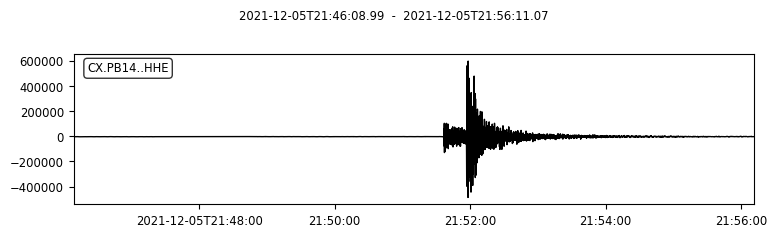

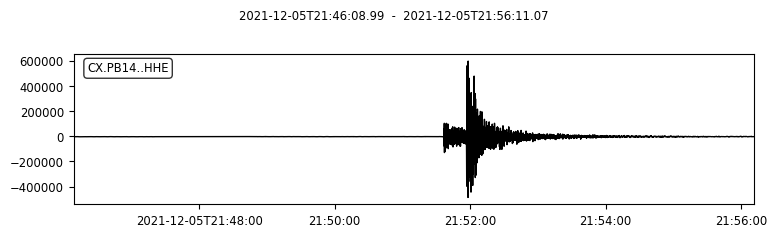

In [109]:
tr.plot()

In [110]:
tr.remove_response(inv)

CX.PB14..HHE | 2021-12-05T21:46:08.990000Z - 2021-12-05T21:56:11.070000Z | 100.0 Hz, 60209 samples

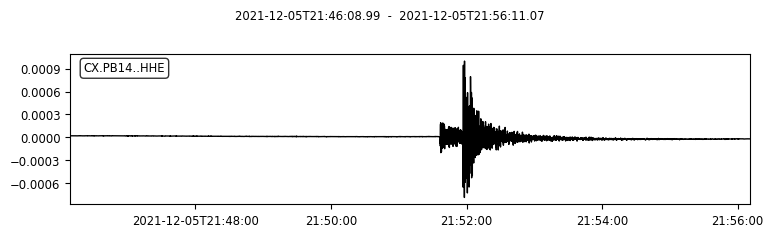

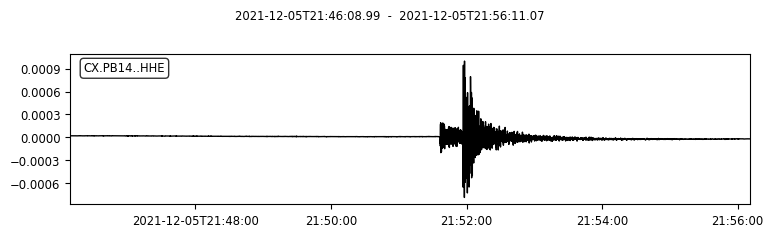

In [111]:
tr.plot()

In [115]:
tr.detrend(); tr.filter('highpass', freq = 0.1)

CX.PB14..HHE | 2021-12-05T21:46:08.990000Z - 2021-12-05T21:56:11.070000Z | 100.0 Hz, 60209 samples

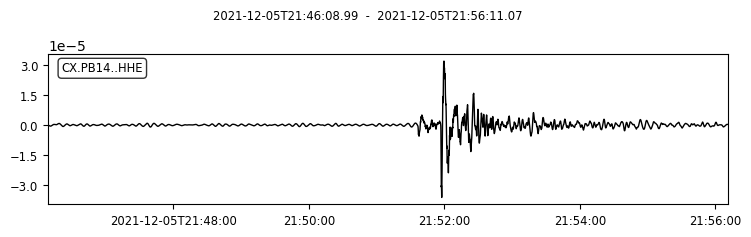

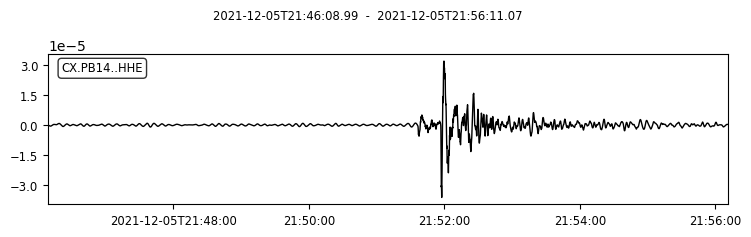

In [116]:
tr.integrate(); tr.plot()

In [7]:
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    #data.interpolate(100, 'lanczos', a = 20)
    
    

columns in df are magntiude bins

rows are distances


In [40]:
len(tdp_all)

15

In [156]:
len(np.median(np.array(ad['5.0'][0]), 0))

10000

onto row/column plot
[ 0.19  0.31  0.7   0.83  1.02]
5.0 0 0.31 16
[ 0.55  0.7   0.79  1.31  2.04]
5.3 0 0.55 17
[ 0.36  0.62  0.87  1.04  1.27]
5.6 0 0.36 15
[ 0.31  1.01  1.29  1.6   2.06]
7.1 0 0.31 0
[ 0.05  0.6   1.23  1.42  1.76]
5.0 1 0.6 36
[ 0.73  0.86  1.    1.05  1.31]
5.3 1 0.73 37
[ 1.43  1.61  1.69  1.99  2.17]
5.6 1 1.43 37
[ 0.7   1.64  2.36  3.06  3.36]
5.9 1 0.7 34
[ 0.09  1.22  1.52  1.85  2.52]
6.2 1 1.22 0
[ 0.7   1.14  1.77  2.19  2.66]
7.1 1 0.7 0
[ 0.5   0.8   1.2   1.34  1.52]
5.0 2 0.5 51
[ 1.33  1.54  1.89  2.51  2.67]
5.3 2 1.33 52
[ 1.05  1.1   1.25  1.49  1.61]
5.6 2 1.05 51
[ 0.39  0.95  1.27  1.53  1.75]
5.9 2 0.39 41
[ 0.6   0.94  1.22  1.54  2.03]
6.2 2 0.6 0
[ 0.92  1.35  1.63  2.54  2.8 ]
7.1 2 0.92 0
[ 0.54  0.59  0.78  0.9   1.04]
5.0 3 0.54 60
[ 1.03  1.27  1.66  1.81  2.07]
5.3 3 1.03 61
[ 0.56  0.62  0.74  0.83  1.08]
5.6 3 0.56 60
[ 0.7   1.82  2.73  2.88  3.72]
5.9 3 0.7 26
[ 0.82  1.06  1.64  2.27  3.02]
6.2 3 0.82 0
[ 0.43  1.19  1.72  2.36 

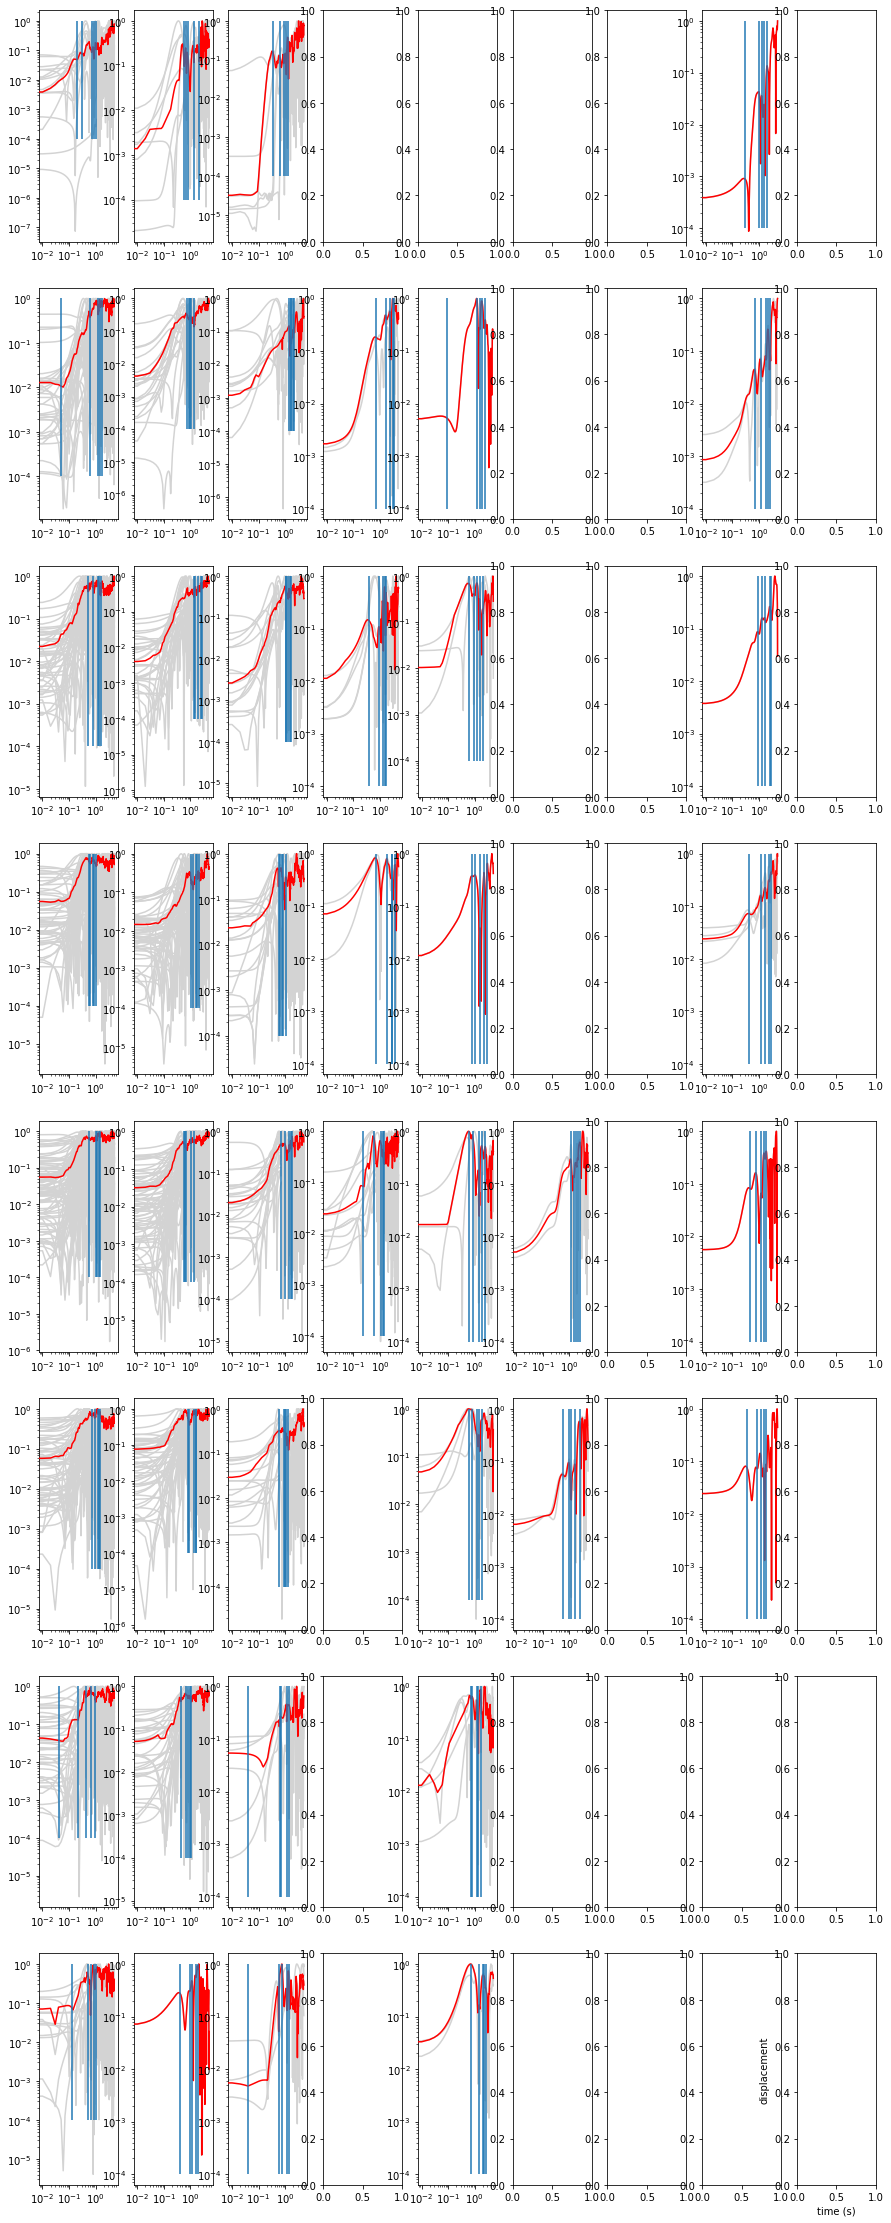

In [32]:
fig, axs = plt.subplots(8, len(df.columns), figsize = (15,40)) #df.shape[1]-1
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns:
        #print('for column')
        #aad[column][row]=df[column][row]/counts[column][row]#df = sum of absolute displacements
        if len(ad[column][row])>0:
            aad[column][row]=np.median(np.array(ad[column][row]), 0)
            aad_bin = aad[column][row]
            # now to find where departure delay exceeds DPD
            # 'simple sequential computation ... comparing the amplitude at a sample
            # with the one at the previous sample ...regardless of the magntiude of the decline'
            # Noda and Ellsworth 2016
            DPD_time = 0.05
            DPD_samples = 5 # sampling rate is 50 Hz
            delay_time = []
            decline = 0 # count how many amplitudes have decreased in a row
            for point in range(1,len(aad_bin)):
                #print('for point in aad')
                if aad_bin[point]<aad_bin[point-1]:
                    #print('less than previous point')
                    decline += 1
                    if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                        delay_time.append(point)
                else:
                    decline = 0 #reset decline counter
            T_dp = np.array(delay_time)/sampling_rate # convert to seconds
            if len(T_dp)>0:
                print(T_dp[0:5])
                for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                    #axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
                    axs[row_count][col_count].vlines(T_dp[i], 0.0001, 1, zorder = 100)
                if float("{:.2f}".format(T_dp[0]))>0.2:
                    print(column, row_count, T_dp[0], counts[column][row])
                    results[row].append([column, row_count, T_dp[0], counts[column][row]])
                elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                    print(column, row_count, T_dp[1], counts[column][row])
                    results[row].append([column, row_count, T_dp[1], counts[column][row]])
            axs[row_count][col_count].plot(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:500]), zorder = 50, color = 'red')
            for ind_ad in ad[column][row]:
                axs[row_count][col_count].plot(np.arange(0, 5, 0.01), ind_ad[:500]/max(ind_ad[:500]), color='lightgrey')
            axs[row_count][col_count].set_xscale('log')
            axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.show()

In [187]:
aad_bin

array([  2.44813105e-06,   2.64412203e-06,   2.85109020e-06, ...,
         7.53421091e-07,   5.83380897e-07,   4.19082451e-07])

onto row/column plot
[ 0.19  0.31  0.7   0.83  1.02]
5.0 0 0.31 16
[ 0.55  0.7   0.79  1.31  2.04]
5.3 0 0.55 17
[ 0.36  0.62  0.87  1.04  1.27]
5.6 0 0.36 15
[ 0.31  1.01  1.29  1.6   2.06]
7.1 0 0.31 0
[ 0.05  0.6   1.23  1.42  1.76]
5.0 1 0.6 36
[ 0.73  0.86  1.    1.05  1.31]
5.3 1 0.73 37
[ 1.43  1.61  1.69  1.99  2.17]
5.6 1 1.43 37
[ 0.7   1.64  2.36  3.06  3.36]
5.9 1 0.7 34
[ 0.09  1.22  1.52  1.85  2.52]
6.2 1 1.22 0
[ 0.7   1.14  1.77  2.19  2.66]
7.1 1 0.7 0
[ 0.5   0.8   1.2   1.34  1.52]
5.0 2 0.5 51
[ 1.33  1.54  1.89  2.51  2.67]
5.3 2 1.33 52
[ 1.05  1.1   1.25  1.49  1.61]
5.6 2 1.05 51
[ 0.39  0.95  1.27  1.53  1.75]
5.9 2 0.39 41
[ 0.6   0.94  1.22  1.54  2.03]
6.2 2 0.6 0
[ 0.92  1.35  1.63  2.54  2.8 ]
7.1 2 0.92 0
[ 0.54  0.59  0.78  0.9   1.04]
5.0 3 0.54 60
[ 1.03  1.27  1.66  1.81  2.07]
5.3 3 1.03 61
[ 0.56  0.62  0.74  0.83  1.08]
5.6 3 0.56 60
[ 0.7   1.82  2.73  2.88  3.72]
5.9 3 0.7 26
[ 0.82  1.06  1.64  2.27  3.02]
6.2 3 0.82 0
[ 0.43  1.19  1.72  2.36 

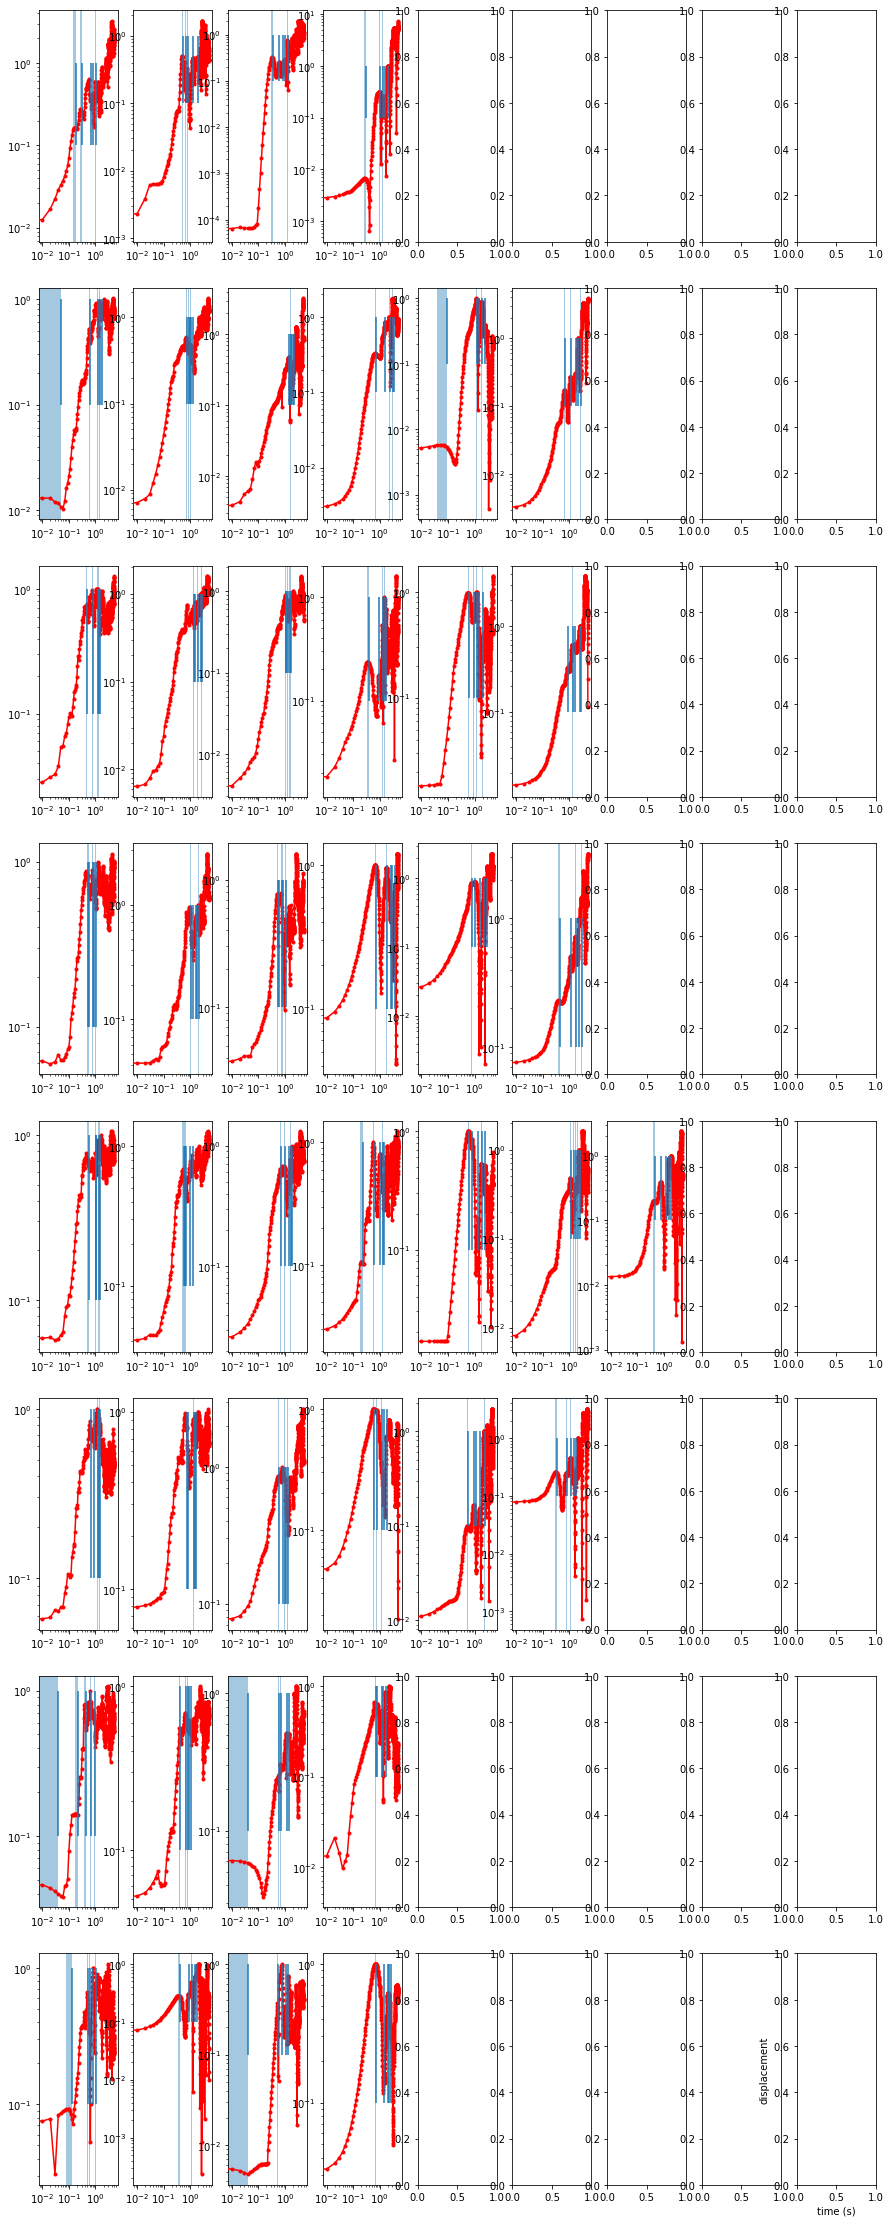

In [33]:
fig, axs = plt.subplots(8, len(df.columns), figsize = (15,40)) #df.shape[1]-1
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns:
        #print('for column')
        #aad[column][row]=df[column][row]/counts[column][row]#df = sum of absolute displacements
        if len(ad[column][row])>0:
            aad[column][row]=np.median(np.array(ad[column][row]), 0)
            aad_bin = aad[column][row]
            # now to find where departure delay exceeds DPD
            # 'simple sequential computation ... comparing the amplitude at a sample
            # with the one at the previous sample ...regardless of the magntiude of the decline'
            # Noda and Ellsworth 2016
            DPD_time = 0.05
            DPD_samples = 5 # sampling rate is 100 Hz
            delay_time = []
            decline = 0 # count how many amplitudes have decreased in a row
            for point in range(1,len(aad_bin)):
                #print('for point in aad')
                if aad_bin[point]<aad_bin[point-1]:
                    #print('less than previous point')
                    decline = decline + 1
                    if decline == 4:#np.ceil(DPD_samples)-1: #if surpassed the DPD
                        delay_time.append(point)
                else:
                    decline = 0 #reset decline counter
            T_dp = np.array(delay_time)/sampling_rate # convert to seconds
            if len(T_dp)>0:
                print(T_dp[0:5])
                for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                    #axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
                    axs[row_count][col_count].vlines(T_dp[i], 0.1, 1, zorder = 100)
                    axs[row_count][col_count].axvspan(T_dp[i]-0.05, T_dp[i], alpha = 0.4)
                if float("{:.2f}".format(T_dp[0]))>0.2:
                    print(column, row_count, T_dp[0], counts[column][row])
                    results[row].append([column, row_count, T_dp[0], counts[column][row]])
                elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                    print(column, row_count, T_dp[1], counts[column][row])
                    results[row].append([column, row_count, T_dp[1], counts[column][row]])
            axs[row_count][col_count].plot(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:250]), zorder = 50, color = 'red')
            axs[row_count][col_count].scatter(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:250]), zorder = 50, color = 'red', marker = '.')
            #axs[row_count][col_count].set_xlim(T_dp[0], T_dp[5])
            #axs[row_count][col_count].set_ylim(0.1, 2)
            axs[row_count][col_count].set_xscale('log')
            axs[row_count][col_count].set_yscale('log') # in log space
            col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.show()

In [234]:
results 

[[['5.0', 0, 0.31, 16],
  ['5.1', 0, 1.05, 17],
  ['5.2', 0, 1.0, 16],
  ['5.3', 0, 0.55000000000000004, 17],
  ['5.4', 0, 0.20999999999999999, 14],
  ['5.5', 0, 1.1799999999999999, 16],
  ['5.6', 0, 0.35999999999999999, 15],
  ['5.8', 0, 0.27000000000000002, 14],
  ['6.0', 0, 0.68999999999999995, 2],
  ['6.4', 0, 1.24, 3]],
 [['5.0', 1, 0.59999999999999998, 36],
  ['5.1', 1, 0.45000000000000001, 37],
  ['5.2', 1, 0.35999999999999999, 36],
  ['5.3', 1, 0.72999999999999998, 37],
  ['5.4', 1, 0.48999999999999999, 16],
  ['5.5', 1, 0.65000000000000002, 35],
  ['5.6', 1, 1.4299999999999999, 37],
  ['5.7', 1, 0.64000000000000001, 37],
  ['5.8', 1, 0.44, 34],
  ['5.9', 1, 0.69999999999999996, 34],
  ['6.0', 1, 0.83999999999999997, 2],
  ['6.1', 1, 1.53, 2],
  ['6.2', 1, 1.22, 2],
  ['6.4', 1, 0.88, 1]],
 [['5.0', 2, 0.5, 51],
  ['5.1', 2, 0.54000000000000004, 52],
  ['5.2', 2, 0.59999999999999998, 51],
  ['5.3', 2, 1.3300000000000001, 52],
  ['5.4', 2, 0.41999999999999998, 51],
  ['5.5', 2, 

In [226]:
results_snr_100 = [[['5.0', 0, 0.58999999999999997, 12],
  ['5.1', 0, 1.05, 13],
  ['5.2', 0, 0.29999999999999999, 12],
  ['5.3', 0, 0.39000000000000001, 12],
  ['5.4', 0, 0.51000000000000001, 10],
  ['5.5', 0, 1.24, 11],
  ['5.6', 0, 0.62, 11],
  ['6.0', 0, 0.40000000000000002, 1]],
 [['5.0', 1, 0.29999999999999999, 21],
  ['5.1', 1, 0.56999999999999995, 22],
  ['5.2', 1, 0.40999999999999998, 22],
  ['5.3', 1, 0.52000000000000002, 22],
  ['5.4', 1, 0.20999999999999999, 6],
  ['5.5', 1, 0.81999999999999995, 21],
  ['5.6', 1, 0.29999999999999999, 22],
  ['5.7', 1, 0.28000000000000003, 22],
  ['5.8', 1, 0.44, 20],
  ['5.9', 1, 0.98999999999999999, 20],
  ['6.0', 1, 0.60999999999999999, 1],
  ['6.1', 1, 1.53, 2],
  ['6.4', 1, 0.82999999999999996, 1]],
 [['5.0', 2, 0.41999999999999998, 29],
  ['5.1', 2, 0.76000000000000001, 30],
  ['5.2', 2, 0.60999999999999999, 29],
  ['5.3', 2, 0.75, 28],
  ['5.4', 2, 0.45000000000000001, 29],
  ['5.5', 2, 0.84999999999999998, 29],
  ['5.6', 2, 0.46999999999999997, 27],
  ['5.7', 2, 0.63, 30],
  ['5.8', 2, 0.48999999999999999, 27],
  ['5.9', 2, 0.45000000000000001, 22],
  ['6.0', 2, 0.91000000000000003, 4],
  ['6.3', 2, 0.47999999999999998, 1],
  ['6.4', 2, 0.94999999999999996, 5]],
 [['5.0', 3, 0.56000000000000005, 27],
  ['5.1', 3, 0.87, 28],
  ['5.2', 3, 0.41999999999999998, 26],
  ['5.3', 3, 0.31, 26],
  ['5.4', 3, 0.37, 22],
  ['5.5', 3, 0.44, 24],
  ['5.6', 3, 0.70999999999999996, 27],
  ['5.7', 3, 0.71999999999999997, 26],
  ['5.8', 3, 0.71999999999999997, 24],
  ['5.9', 3, 0.69999999999999996, 14],
  ['6.0', 3, 0.58999999999999997, 2],
  ['6.2', 3, 0.81999999999999995, 2],
  ['6.3', 3, 0.46000000000000002, 2],
  ['6.4', 3, 0.69999999999999996, 2],
  ['7.0', 3, 0.96999999999999997, 1]],
 [['5.0', 4, 0.63, 28],
  ['5.1', 4, 0.44, 29],
  ['5.2', 4, 0.46999999999999997, 29],
  ['5.3', 4, 0.89000000000000001, 29],
  ['5.4', 4, 0.35999999999999999, 25],
  ['5.5', 4, 0.76000000000000001, 29],
  ['5.6', 4, 0.68999999999999995, 29],
  ['5.7', 4, 0.29999999999999999, 29],
  ['5.8', 4, 0.80000000000000004, 29],
  ['5.9', 4, 0.23000000000000001, 29],
  ['6.0', 4, 0.47999999999999998, 8],
  ['6.2', 4, 0.54000000000000004, 9],
  ['6.4', 4, 0.69999999999999996, 2],
  ['6.6', 4, 0.81999999999999995, 1]],
 [['5.0', 5, 0.65000000000000002, 27],
  ['5.1', 5, 0.65000000000000002, 28],
  ['5.2', 5, 0.47999999999999998, 26],
  ['5.3', 5, 0.40000000000000002, 27],
  ['5.4', 5, 0.45000000000000001, 25],
  ['5.5', 5, 0.91000000000000003, 23],
  ['5.6', 5, 0.60999999999999999, 23],
  ['5.7', 5, 0.57999999999999996, 28],
  ['5.8', 5, 0.81000000000000005, 23],
  ['6.0', 5, 0.55000000000000004, 6],
  ['6.1', 5, 0.93999999999999995, 4],
  ['6.2', 5, 0.63, 7],
  ['6.4', 5, 0.96999999999999997, 1],
  ['6.5', 5, 0.57999999999999996, 2]],
 [['5.0', 6, 0.46000000000000002, 15],
  ['5.1', 6, 0.51000000000000001, 16],
  ['5.2', 6, 0.41999999999999998, 16],
  ['5.3', 6, 0.51000000000000001, 16],
  ['5.4', 6, 0.67000000000000004, 9],
  ['5.5', 6, 0.42999999999999999, 13],
  ['5.6', 6, 0.98999999999999999, 16],
  ['5.7', 6, 0.52000000000000002, 16],
  ['5.8', 6, 0.93999999999999995, 13],
  ['6.0', 6, 0.70999999999999996, 2],
  ['6.1', 6, 0.89000000000000001, 1]],
 [['5.0', 7, 0.56000000000000005, 2],
  ['5.1', 7, 0.87, 3],
  ['5.2', 7, 0.5, 3],
  ['5.3', 7, 0.40999999999999998, 1],
  ['5.4', 7, 0.5, 3],
  ['5.5', 7, 1.3200000000000001, 3],
  ['5.7', 7, 0.84999999999999998, 3],
  ['6.1', 7, 0.54000000000000004, 1]]]

In [235]:
results_snr_10 =  [[['5.0', 0, 0.31, 16],
  ['5.1', 0, 1.05, 17],
  ['5.2', 0, 1.0, 16],
  ['5.3', 0, 0.55000000000000004, 17],
  ['5.4', 0, 0.20999999999999999, 14],
  ['5.5', 0, 1.1799999999999999, 16],
  ['5.6', 0, 0.35999999999999999, 15],
  ['5.8', 0, 0.27000000000000002, 14],
  ['6.0', 0, 0.68999999999999995, 2],
  ['6.4', 0, 1.24, 3]],
 [['5.0', 1, 0.59999999999999998, 36],
  ['5.1', 1, 0.45000000000000001, 37],
  ['5.2', 1, 0.35999999999999999, 36],
  ['5.3', 1, 0.72999999999999998, 37],
  ['5.4', 1, 0.48999999999999999, 16],
  ['5.5', 1, 0.65000000000000002, 35],
  ['5.6', 1, 1.4299999999999999, 37],
  ['5.7', 1, 0.64000000000000001, 37],
  ['5.8', 1, 0.44, 34],
  ['5.9', 1, 0.69999999999999996, 34],
  ['6.0', 1, 0.83999999999999997, 2],
  ['6.1', 1, 1.53, 2],
  ['6.2', 1, 1.22, 2],
  ['6.4', 1, 0.88, 1]],
 [['5.0', 2, 0.5, 51],
  ['5.1', 2, 0.54000000000000004, 52],
  ['5.2', 2, 0.59999999999999998, 51],
  ['5.3', 2, 1.3300000000000001, 52],
  ['5.4', 2, 0.41999999999999998, 51],
  ['5.5', 2, 0.37, 51],
  ['5.6', 2, 1.05, 51],
  ['5.7', 2, 0.54000000000000004, 52],
  ['5.8', 2, 0.5, 48],
  ['5.9', 2, 0.39000000000000001, 41],
  ['6.0', 2, 0.39000000000000001, 5],
  ['6.2', 2, 0.59999999999999998, 6],
  ['6.3', 2, 0.29999999999999999, 3],
  ['6.4', 2, 0.82999999999999996, 6],
  ['6.9', 2, 0.29999999999999999, 4]],
 [['5.0', 3, 0.54000000000000004, 60],
  ['5.1', 3, 0.63, 61],
  ['5.2', 3, 0.73999999999999999, 58],
  ['5.3', 3, 1.03, 61],
  ['5.4', 3, 0.34999999999999998, 48],
  ['5.5', 3, 0.87, 55],
  ['5.6', 3, 0.56000000000000005, 60],
  ['5.7', 3, 0.80000000000000004, 58],
  ['5.8', 3, 0.72999999999999998, 49],
  ['5.9', 3, 0.69999999999999996, 26],
  ['6.0', 3, 0.58999999999999997, 2],
  ['6.1', 3, 0.46999999999999997, 2],
  ['6.2', 3, 0.81999999999999995, 2],
  ['6.3', 3, 0.46000000000000002, 2],
  ['6.4', 3, 0.72999999999999998, 2],
  ['7.0', 3, 0.96999999999999997, 1]],
 [['5.0', 4, 0.55000000000000004, 93],
  ['5.1', 4, 0.59999999999999998, 94],
  ['5.2', 4, 0.68000000000000005, 91],
  ['5.3', 4, 0.56000000000000005, 91],
  ['5.4', 4, 0.75, 91],
  ['5.5', 4, 0.67000000000000004, 87],
  ['5.6', 4, 0.69999999999999996, 91],
  ['5.7', 4, 0.34999999999999998, 94],
  ['5.8', 4, 0.65000000000000002, 91],
  ['5.9', 4, 0.23000000000000001, 93],
  ['6.0', 4, 0.52000000000000002, 17],
  ['6.1', 4, 0.45000000000000001, 4],
  ['6.2', 4, 0.63, 18],
  ['6.3', 4, 0.55000000000000004, 4],
  ['6.4', 4, 1.03, 2],
  ['6.5', 4, 1.1299999999999999, 2],
  ['6.6', 4, 0.81999999999999995, 1]],
 [['5.0', 5, 0.69999999999999996, 67],
  ['5.1', 5, 0.68999999999999995, 68],
  ['5.2', 5, 0.48999999999999999, 60],
  ['5.3', 5, 0.78000000000000003, 68],
  ['5.4', 5, 0.78000000000000003, 49],
  ['5.5', 5, 0.97999999999999998, 49],
  ['5.6', 5, 0.59999999999999998, 61],
  ['5.7', 5, 0.62, 68],
  ['5.8', 5, 0.66000000000000003, 49],
  ['6.0', 5, 0.34999999999999998, 15],
  ['6.1', 5, 0.64000000000000001, 8],
  ['6.2', 5, 0.63, 16],
  ['6.4', 5, 0.73999999999999999, 6],
  ['6.5', 5, 0.56999999999999995, 6]],
 [['5.0', 6, 0.22, 45],
  ['5.1', 6, 0.44, 46],
  ['5.2', 6, 0.71999999999999997, 44],
  ['5.3', 6, 0.42999999999999999, 46],
  ['5.4', 6, 0.59999999999999998, 25],
  ['5.5', 6, 0.26000000000000001, 44],
  ['5.6', 6, 0.60999999999999999, 46],
  ['5.7', 6, 0.53000000000000003, 46],
  ['5.8', 6, 1.0700000000000001, 32],
  ['6.0', 6, 0.64000000000000001, 3],
  ['6.1', 6, 0.89000000000000001, 1],
  ['6.2', 6, 0.71999999999999997, 4],
  ['6.3', 6, 0.65000000000000002, 4]],
 [['5.0', 7, 0.52000000000000002, 13],
  ['5.1', 7, 0.38, 14],
  ['5.2', 7, 0.56999999999999995, 14],
  ['5.3', 7, 0.40999999999999998, 4],
  ['5.4', 7, 0.5, 13],
  ['5.5', 7, 0.85999999999999999, 12],
  ['5.6', 7, 0.56000000000000005, 12],
  ['5.7', 7, 0.89000000000000001, 12],
  ['5.8', 7, 0.48999999999999999, 10],
  ['6.1', 7, 0.54000000000000004, 1],
  ['6.2', 7, 0.73999999999999999, 1]]]

In [236]:
mags_plot_10 = []
dist_plot_10 = []
dt_plot_10 = []
n_plot_10 = []
for k in results_snr_10:
    for l in k:
        mags_plot_10.append(float(l[0]))
        dist_plot_10.append(l[1])
        dt_plot_10.append(l[2])
        n_plot_10.append(l[3])

In [227]:
mags_plot_100 = []
dist_plot_100 = []
dt_plot_100 = []
n_plot_100 = []
for k in results_snr_100:
    for l in k:
        mags_plot_100.append(float(l[0]))
        dist_plot_100.append(l[1])
        dt_plot_100.append(l[2])
        n_plot_100.append(l[3])

In [218]:
results_snr_100

[[['5.0', 0, 0.58999999999999997, 12],
  ['5.1', 0, 1.05, 13],
  ['5.2', 0, 0.29999999999999999, 12],
  ['5.3', 0, 0.39000000000000001, 12],
  ['5.4', 0, 0.51000000000000001, 10],
  ['5.5', 0, 1.24, 11],
  ['5.6', 0, 0.62, 11]],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

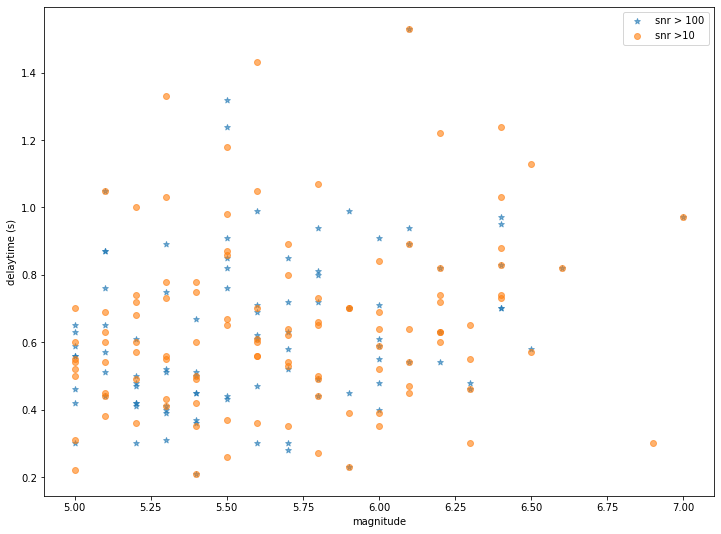

In [252]:
plt.scatter(mags_plot_100, dt_plot_100, marker = '*', alpha = 0.6, label = 'snr > 100')#c = dist_plot_100,)
plt.scatter(mags_plot_10, dt_plot_10, marker = 'o', alpha = 0.6, label = 'snr >10') #c = dist_plot_10, 
plt.legend()
plt.ylabel('delaytime (s)')
plt.xlabel('magnitude')
fig = plt.gcf()
fig.set_size_inches(12,9)

In [64]:
pl.cm.jet(np.linspace(5.0,7.0,21))

array([[ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ]])

onto row/column plot


/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad

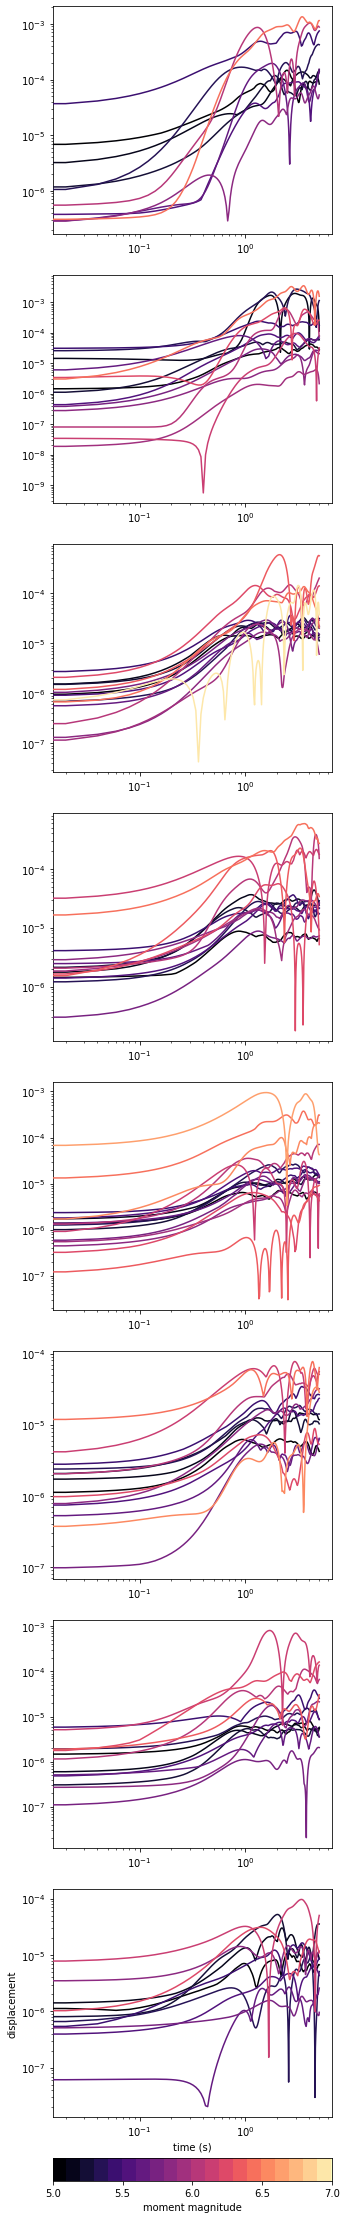

In [167]:
fig, axs = plt.subplots(9, 1, figsize=(5, 40), gridspec_kw={'height_ratios': [5,5,5,5,5,5,5,5, 0.5]})

import matplotlib.patches as mpatches
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
import matplotlib.pylab as pl
colors = pl.cm.magma(np.linspace(0,1,21))
#cmap = pl.cm.get_cmap('magma', 21)  
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns[:-1]:#columns are magnitudes
        #print('for column')
        aad[column][row]=df[column][row]/counts[column][row]
        aad_bin = aad[column][row]
        # now to find where departure delay exceeds DPD
        # 'simple sequential computation ... comparing the amplitude at a sample
        # with the one at the previous sample ...regardless of the magntiude of the decline'
        # Noda and Ellsworth 2016
        DPD_time = 0.05
        DPD_samples = 5 # sampling rate is 50 Hz
        delay_time = []
        decline = 0 # count how many amplitudes have decreased in a row
        for point in range(1,len(aad_bin)):
            #print('for point in aad')
            if aad_bin[point]<aad_bin[point-1]:
                #print('less than previous point')
                decline += 1
                if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                    delay_time.append(point)
            else:
                decline = 0 #reset decline counter
        T_dp = np.array(delay_time)/sampling_rate # convert to seconds
        if len(T_dp)>0:
            #print(T_dp[0:5])
            #for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
            #    axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
            if float("{:.2f}".format(T_dp[0]))>0.2:
                #print(column, row_count, T_dp[0], counts[column][row])
                results[row].append([column, row_count, T_dp[0], counts[column][row]])
            elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                #print(column, row_count, T_dp[1], counts[column][row])
                results[row].append([column, row_count, T_dp[1], counts[column][row]])
        axs[row_count].plot(np.arange(0, 5, 0.02), aad[column][row][:250], zorder = 50, color = colors[col_count])
        #for ind_ad in ad[column][row]:
        #    axs[row_count][col_count].plot(np.arange(0, 5, 0.02), ind_ad[:250], color='lightgrey')
        axs[row_count].set_xscale('log')
        axs[row_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1

    axs[r].set_ylabel('displacement')
axs[r].set_xlabel('time (s)')

left = 5
axs[8].set_ylim([0,1])
axs[8].set_xlim([5,7])
for c in range(0, 21):
    rect=mpatches.Rectangle((left,0),0.1,1, fill=True,color=colors[c],linewidth=2,facecolor=colors[c])
    axs[8].add_patch(rect)
    left += 0.1
axs[8].set_xlabel('moment magnitude')
axs[8].set_xticks(np.arange(5,7.1,0.5))
axs[8].set_yticks([])
#cax = axs[8].add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
#fig.colorbar(colors, cax=axs[8], orientation='horizontal')
#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')

plt.show()

In [24]:
results[1]

[['5.0', 1, 0.51000000000000001, 54],
 ['5.1', 1, 0.90000000000000002, 55],
 ['5.2', 1, 0.22, 53],
 ['5.3', 1, 0.92000000000000004, 55],
 ['5.4', 1, 0.68999999999999995, 47],
 ['5.5', 1, 0.75, 52],
 ['5.6', 1, 0.29999999999999999, 55],
 ['5.7', 1, 1.02, 55],
 ['5.8', 1, 1.6000000000000001, 52],
 ['5.9', 1, 0.68000000000000005, 51],
 ['6.0', 1, 1.24, 5],
 ['6.1', 1, 1.05, 2],
 ['6.2', 1, 0.59999999999999998, 6],
 ['6.3', 1, 0.63, 2],
 ['6.4', 1, 0.91000000000000003, 1]]

In [10]:
#%%script false --no-raise-error
results = [['5.0', 0, 0.32000000000000001, 23],
 ['5.1', 0, 0.58999999999999997, 24],
 ['5.2', 0, 0.35999999999999999, 2],
 ['5.3', 0, 0.5, 11],
 ['5.4', 0, 0.72999999999999998, 24],
 ['5.5', 0, 0.62, 2],
 ['5.6', 0, 0.92000000000000004, 2],
 ['6.0', 0, 0.56000000000000005, 2],
 ['6.1', 0, 1.5700000000000001, 2],
 ['6.4', 0, 1.3600000000000001, 3],
 ['5.0', 1, 0.52000000000000002, 50],
 ['5.1', 1, 0.37, 50],
 ['5.2', 1, 0.56999999999999995, 31],
 ['5.3', 1, 0.76000000000000001, 31],
 ['5.4', 1, 0.69999999999999996, 50],
 ['5.5', 1, 0.29999999999999999, 6],
 ['5.6', 1, 0.46999999999999997, 7],
 ['5.7', 1, 0.52000000000000002, 6],
 ['5.8', 1, 0.96999999999999997, 30],
 ['5.9', 1, 1.0800000000000001, 31],
 ['6.0', 1, 0.5, 2],
 ['6.2', 1, 0.64000000000000001, 1],
 ['6.4', 1, 0.91000000000000003, 3],
 ['6.8', 1, 1.1899999999999999, 3],
 ['5.0', 2, 0.48999999999999999, 65],
 ['5.1', 2, 0.45000000000000001, 66],
 ['5.2', 2, 0.41999999999999998, 32],
 ['5.3', 2, 0.54000000000000004, 44],
 ['5.4', 2, 0.42999999999999999, 66],
 ['5.5', 2, 0.55000000000000004, 8],
 ['5.6', 2, 0.59999999999999998, 45],
 ['5.8', 2, 0.52000000000000002, 42],
 ['5.9', 2, 0.58999999999999997, 44],
 ['6.0', 2, 1.3600000000000001, 7],
 ['6.1', 2, 0.56999999999999995, 7],
 ['6.3', 2, 1.1000000000000001, 1],
 ['6.4', 2, 1.8100000000000001, 8],
 ['6.6', 2, 0.94999999999999996, 1],
 ['5.0', 3, 0.47999999999999998, 66],
 ['5.1', 3, 0.56999999999999995, 67],
 ['5.2', 3, 0.68999999999999995, 53],
 ['5.3', 3, 0.56000000000000005, 67],
 ['5.4', 3, 0.54000000000000004, 67],
 ['5.5', 3, 0.56999999999999995, 36],
 ['5.6', 3, 0.76000000000000001, 38],
 ['5.7', 3, 0.63, 53],
 ['5.8', 3, 0.70999999999999996, 28],
 ['5.9', 3, 0.20999999999999999, 53],
 ['6.0', 3, 1.23, 10],
 ['6.1', 3, 1.05, 9],
 ['6.3', 3, 0.56000000000000005, 9],
 ['6.4', 3, 1.1599999999999999, 11],
 ['6.6', 3, 0.68000000000000005, 1],
 ['6.7', 3, 1.1299999999999999, 2],
 ['6.8', 3, 0.35999999999999999, 11],
 ['5.0', 4, 0.56000000000000005, 56],
 ['5.1', 4, 0.42999999999999999, 56],
 ['5.2', 4, 0.68000000000000005, 21],
 ['5.3', 4, 0.48999999999999999, 56],
 ['5.4', 4, 0.46999999999999997, 56],
 ['5.5', 4, 0.46000000000000002, 4],
 ['5.6', 4, 0.58999999999999997, 38],
 ['5.7', 4, 0.57999999999999996, 4],
 ['5.8', 4, 0.63, 36],
 ['5.9', 4, 0.56000000000000005, 25],
 ['6.0', 4, 1.22, 5],
 ['6.3', 4, 0.65000000000000002, 5],
 ['6.4', 4, 1.29, 6],
 ['6.6', 4, 0.35999999999999999, 1],
 ['6.7', 4, 0.72999999999999998, 1],
 ['6.8', 4, 1.3200000000000001, 6],
 ['5.0', 5, 0.59999999999999998, 9],
 ['5.1', 5, 0.60999999999999999, 10],
 ['5.2', 5, 0.77000000000000002, 10],
 ['5.3', 5, 0.78000000000000003, 10],
 ['5.4', 5, 0.42999999999999999, 10],
 ['5.6', 5, 0.75, 1],
 ['5.7', 5, 0.56000000000000005, 10],
 ['6.0', 5, 0.67000000000000004, 5],
 ['6.3', 5, 0.69999999999999996, 6],
 ['5.0', 6, 0.60999999999999999, 9],
 ['5.1', 6, 0.73999999999999999, 9],
 ['5.2', 6, 0.95999999999999996, 9],
 ['5.3', 6, 0.39000000000000001, 5],
 ['5.4', 6, 0.62, 10],
 ['5.0', 7, 0.62, 10],
 ['5.2', 7, 0.54000000000000004, 10],
 ['5.3', 7, 0.77000000000000002, 11],
 ['5.4', 7, 0.46999999999999997, 9]]

In [10]:
import numpy as np
from scipy import optimize, linalg
import matplotlib.pyplot as plt

def model_function(x_data, a, b):
    return a*x_data + b

In [18]:
results

[['5.0', 0, 0.32, 23],
 ['5.1', 0, 0.59, 24],
 ['5.2', 0, 0.36, 2],
 ['5.3', 0, 0.5, 11],
 ['5.4', 0, 0.73, 24],
 ['5.5', 0, 0.62, 2],
 ['5.6', 0, 0.92, 2],
 ['6.0', 0, 0.56, 2],
 ['6.1', 0, 1.57, 2],
 ['6.4', 0, 1.36, 3],
 ['5.0', 1, 0.52, 50],
 ['5.1', 1, 0.37, 50],
 ['5.2', 1, 0.57, 31],
 ['5.3', 1, 0.76, 31],
 ['5.4', 1, 0.7, 50],
 ['5.5', 1, 0.3, 6],
 ['5.6', 1, 0.47, 7],
 ['5.7', 1, 0.52, 6],
 ['5.8', 1, 0.97, 30],
 ['5.9', 1, 1.08, 31],
 ['6.0', 1, 0.5, 2],
 ['6.2', 1, 0.64, 1],
 ['6.4', 1, 0.91, 3],
 ['6.8', 1, 1.19, 3],
 ['5.0', 2, 0.49, 65],
 ['5.1', 2, 0.45, 66],
 ['5.2', 2, 0.42, 32],
 ['5.3', 2, 0.54, 44],
 ['5.4', 2, 0.43, 66],
 ['5.5', 2, 0.55, 8],
 ['5.6', 2, 0.6, 45],
 ['5.8', 2, 0.52, 42],
 ['5.9', 2, 0.59, 44],
 ['6.0', 2, 1.36, 7],
 ['6.1', 2, 0.57, 7],
 ['6.3', 2, 1.1, 1],
 ['6.4', 2, 1.81, 8],
 ['6.6', 2, 0.95, 1],
 ['5.0', 3, 0.48, 66],
 ['5.1', 3, 0.57, 67],
 ['5.2', 3, 0.69, 53],
 ['5.3', 3, 0.56, 67],
 ['5.4', 3, 0.54, 67],
 ['5.5', 3, 0.57, 36],
 ['5.6', 3, 0

In [17]:
results_concat

array([['5.0', '0', '0.73', '10'],
       ['5.1', '0', '0.44', '11'],
       ['5.2', '0', '0.43', '11'],
       ['5.3', '0', '0.44', '10'],
       ['5.4', '0', '0.73', '2'],
       ['5.6', '0', '0.93', '2'],
       ['6.0', '0', '0.4', '1'],
       ['5.0', '1', '0.6', '14'],
       ['5.1', '1', '0.46', '15'],
       ['5.2', '1', '0.38', '15'],
       ['5.3', '1', '0.55', '5'],
       ['5.4', '1', '0.8', '5'],
       ['5.5', '1', '0.79', '15'],
       ['5.7', '1', '0.65', '15'],
       ['5.8', '1', '0.44', '15'],
       ['6.0', '1', '0.61', '1'],
       ['6.4', '1', '0.83', '1'],
       ['5.0', '2', '0.61', '20'],
       ['5.1', '2', '0.33', '21'],
       ['5.2', '2', '0.46', '21'],
       ['5.3', '2', '0.36', '21'],
       ['5.4', '2', '0.57', '20'],
       ['5.5', '2', '0.58', '21'],
       ['5.6', '2', '0.58', '21'],
       ['5.7', '2', '0.87', '21'],
       ['5.8', '2', '0.78', '21'],
       ['6.0', '2', '1.44', '1'],
       ['6.2', '2', '0.66', '1'],
       ['6.3', '2', '1.09', '1']

In [29]:
all_mag = []
n = []
tdp_all = []
results_concat = []
#for i in results:
results_concat = np.concatenate(results)
for i in results_concat:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
    n.append(float(i[3]))
y = all_mag
x = tdp_all    
x = np.array(x)

In [14]:
results_concat

array(['5.0', '0', '0.32', '23', '5.1', '0', '0.59', '24', '5.2', '0',
       '0.36', '2', '5.3', '0', '0.5', '11', '5.4', '0', '0.73', '24',
       '5.5', '0', '0.62', '2', '5.6', '0', '0.92', '2', '6.0', '0',
       '0.56', '2', '6.1', '0', '1.57', '2', '6.4', '0', '1.36', '3',
       '5.0', '1', '0.52', '50', '5.1', '1', '0.37', '50', '5.2', '1',
       '0.57', '31', '5.3', '1', '0.76', '31', '5.4', '1', '0.7', '50',
       '5.5', '1', '0.3', '6', '5.6', '1', '0.47', '7', '5.7', '1', '0.52',
       '6', '5.8', '1', '0.97', '30', '5.9', '1', '1.08', '31', '6.0', '1',
       '0.5', '2', '6.2', '1', '0.64', '1', '6.4', '1', '0.91', '3', '6.8',
       '1', '1.19', '3', '5.0', '2', '0.49', '65', '5.1', '2', '0.45',
       '66', '5.2', '2', '0.42', '32', '5.3', '2', '0.54', '44', '5.4',
       '2', '0.43', '66', '5.5', '2', '0.55', '8', '5.6', '2', '0.6', '45',
       '5.8', '2', '0.52', '42', '5.9', '2', '0.59', '44', '6.0', '2',
       '1.36', '7', '6.1', '2', '0.57', '7', '6.3', '2', '

In [ ]:
initial_guess = (1.5, 6)

In [ ]:
def obj(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    #importance = np.array(n)
    m_real = np.array(all_mag)
    x = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real))
def obj_2(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum((m_guess-m_real)**2)

def obj_flipped(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    t_guess = (a*m_real+b)
    return sum(abs(t_guess-t))

In [ ]:
res = optimize.minimize(obj, initial_guess, method = 'Nelder-Mead')

In [ ]:
res

In [ ]:
a = 2.29
b = 5.95
m_real = np.array(all_mag)
t = np.log10(np.array(tdp_all))
m_guess = (a*t+b)
sum(abs(m_guess-m_real))

BOOTSTRAPPING -- np.polyfit

In [ ]:
import random 
def bootstrapping_function():
    m_all = np.array(all_mag)
    t_all = np.array(tdp_all)
    t_BS = []
    m_BS = []
    for count in range(0,len(t_all)):
        #print(count)
        i = random.randrange(0,len(t_all))
        t_BS.append(t_all[i])
        m_BS.append(m_all[i])
    print(t_BS[0], m_BS[0])
    return m_BS, t_BS

In [ ]:
def obj_BS_1(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = m_BS
    t = t_BS#, t = bootstrapping_function()
    #print(m_real[0], t[0])
    t = np.log10(t)
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real))
def obj_BS_2(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = m_BS
    t = t_BS#, t = bootstrapping_function()
    t = np.log10(t)
    m_guess = (a*t+b)
    return sum((m_guess-m_real)**2)

In [ ]:
gradt = []
intercepts = []
gradt_2 = []
intercepts_2 = []
gradt_polyfit = []
intercepts_polyfit = []
for bs in range(0, 1000):
    print('bootstrapping run'+str(bs))
    initial_guess = (0, 0)
    m_BS, t_BS = bootstrapping_function()
    res = optimize.minimize(obj_BS_1, initial_guess, method = 'TNC')
    gradt.append(res.x[0])
    intercepts.append(res.x[1])
    #print('bootstrapping run'+str(bs))
    initial_guess = (0, 0)
    res = optimize.minimize(obj_BS_2, initial_guess, method = 'TNC')
    gradt_2.append(res.x[0])
    intercepts_2.append(res.x[1])  
    [a, b] = np.polyfit(x=np.log10(t_BS), y=np.array(m_BS), deg=1)
    gradt_polyfit.append(a)
    intercepts_polyfit.append(b)    

In [ ]:

#for bs in range(0, 100):
#    print('bootstrapping run'+str(bs))
#    m_BS, t_BS = bootstrapping_function()
#    [a, b] = np.polyfit(x=np.log10(t_BS), y=np.array(m_BS), deg=1)
#    gradt_polyfit.append(a)
#    intercepts_polyfit.append(b)

In [ ]:
min(intercepts), max(intercepts)

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
i_bins = list(np.arange(5,6.5, 0.02))
g_bins = list(np.arange(-2, 3,0.1))

res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
res_3 = optimize.minimize(obj, initial_guess, method = 'TNC')
res_2 = optimize.minimize(obj_2, initial_guess, method = 'nelder-mead')

intercepts.sort()
intercepts_2.sort()
n, bins, patches = axs[0].hist(intercepts, bins = i_bins, label = 'optimize.minimize 1-norm', alpha = 0.3)
axs[0].hist(intercepts_2, bins = i_bins, label = 'optimize.minimize 2-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)
#axs[0].hist(intercepts_polyfit, bins = i_bins, label = 'polyfit', alpha = 0.3, histtype='step', linewidth=2, hatch='.', edgecolor='k',fill=True)
axs[0].vlines(res.x[1], 0, 200, color = 'tab:blue', label = 'optimize.minimize all data, 1-norm')
axs[0].vlines(res_3.x[1], 0, 200, color = 'tab:green', label = 'TNC optimize.minimize all data, 1-norm')
axs[0].vlines(res_2.x[1], 0, 200, color = 'tab:orange', label = 'optimize.minimize all data, 2-norm')
axs[0].vlines(5.95, 0, 200, color = 'k', label = 'published')
axs[0].vlines(intercepts[25], 0, 200, linestyle = ':')
axs[0].vlines(intercepts[975], 0, 200, linestyle = ':')
axs[0].vlines(intercepts_2[25], 0, 200, linestyle = ':', color = 'orange')
axs[0].vlines(intercepts_2[975], 0, 200, linestyle = ':', color = 'orange')

gradt.sort()
gradt_2.sort()
axs[1].vlines(res.x[0], 0 , 200, color='tab:blue', label = 'optimize.minimize all data, 1-norm')
axs[1].vlines(res_2.x[0], 0 , 200, color='tab:orange', label = 'optimize.minimize all data, 2-norm')
axs[1].vlines(res_3.x[0], 0 , 200, color='tab:green', label = 'TNC optimize.minimize all data, 2-norm')
axs[1].vlines(2.29, 0 , 200, color = 'k', label = 'published')
axs[1].vlines(gradt[25], 0 , 200, linestyle = ':')
axs[1].vlines(gradt[975], 0 , 200, linestyle = ':')
axs[1].vlines(gradt_2[25], 0 , 200, linestyle = ':', color = 'tab:orange')
axs[1].vlines(gradt_2[975], 0 , 200, linestyle = ':', color = 'tab:orange')
axs[1].hist(gradt, bins = g_bins, label = 'optimize.minimize 1-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)
axs[1].hist(gradt_2, bins = g_bins, label = 'optimize.minimize 2-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)

axs[0].set_title('intercepts')
axs[0].ticklabel_format(useOffset=False)
axs[0].ticklabel_format(useOffset=False)
#axs[1].hist(gradt_polyfit, bins = g_bins, label = 'polyfit', alpha = 0.3, histtype='step', linewidth=2, hatch='.', edgecolor='k',fill=True)
axs[1].set_title('gradients')
axs[1].ticklabel_format(useOffset=False)
axs[1].ticklabel_format(useOffset=False)
axs[0].legend()
axs[1].legend()

In [ ]:
max(gradt)

In [ ]:
intercepts[25]

In [42]:
q = 0
for i in results:
    for j in i:
        q = q+j[-1]


In [43]:
q

3594

0.419800986407 5.60930315909
1.1130167183 5.63507563715
 final_simplex: (array([[ 1.11301672,  5.63507564],
       [ 1.11292922,  5.63506064],
       [ 1.11309168,  5.63506616]]), array([ 3.22841899,  3.22842462,  3.22842982]))
           fun: 3.2284189941303083
       message: 'Optimization terminated successfully.'
          nfev: 211
           nit: 110
        status: 0
       success: True
             x: array([ 1.11301672,  5.63507564])
0.419800986407 5.60930315909
1.1130167183 5.63507563715
 final_simplex: (array([[ 1.11301672,  5.63507564],
       [ 1.11292922,  5.63506064],
       [ 1.11309168,  5.63506616]]), array([ 3.22841899,  3.22842462,  3.22842982]))
           fun: 3.2284189941303083
       message: 'Optimization terminated successfully.'
          nfev: 211
           nit: 110
        status: 0
       success: True
             x: array([ 1.11301672,  5.63507564])
0.771754702869 5.74264578186
1.04339551807 5.90723875357
 final_simplex: (array([[ 1.04339552,  5.907238

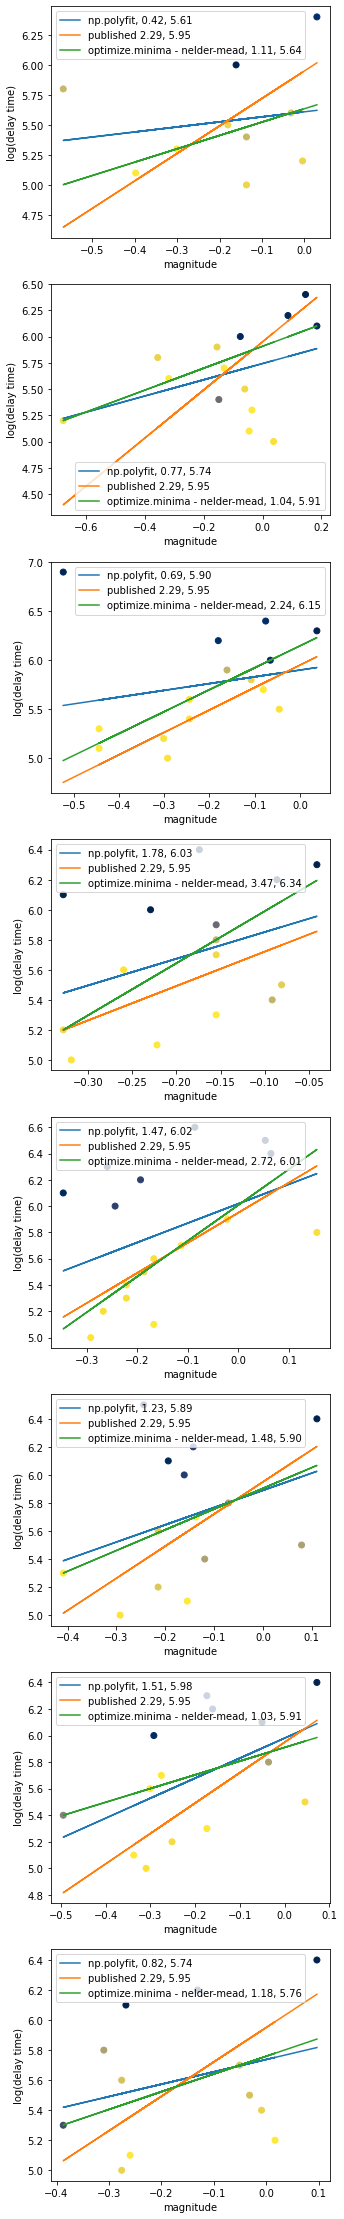

In [54]:
#%conda install ipympl
%matplotlib inline
initial_guess = (0,0)#2.29,5.95)
fig, axs = plt.subplots(8,1, figsize=(5,40))
for r in range(0, 8):
    all_mag = []
    n = []
    tdp_all = []
    for i in results[r]:
        all_mag.append(float(i[0]))
        tdp_all.append(float(i[2]))
        n.append(float(i[3]))
    y = all_mag
    x = tdp_all    
    x = np.array(x)
    
    def obj(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum(abs(m_guess-m_real))
    def obj_2(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum((m_guess-m_real)**2)

    def obj_flipped(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        t_guess = (a*m_real+b)
        return sum(abs(t_guess-t))
    def obj_weighted(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum(abs(m_guess-m_real)*n)

    #===================================================================
    sc = axs[r].scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'cividis')
    #axs[r][0].scatter(np.log10(tdp_all), all_mag, marker = '.', color='k')
    #cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
    axs[r].plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
                label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
    print(a,b)

    axs[r].plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
                label='published 2.29, 5.95')

    res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
    axs[r].plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
                label='optimize.minima - nelder-mead, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
    print(res.x[0], res.x[1])
    print(res)
    axs[r].set_xlabel('log(delay time)')
    axs[r].set_ylabel('magnitude')

    #===================================================================
    '''sc = axs[r][1].scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'gray')
    #cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
    axs[r][1].plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
                label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
    print(a,b)

    axs[r][1].plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
                label='published 2.29, 5.95')

    res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
    axs[r][1].plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
                label='optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
    print(res.x[0], res.x[1])
    print(res)
    axs[r][1].set_xlabel('log(delay time)')
    axs[r][1].set_ylabel('magnitude')'''
    '''sc = axs[r][1].scatter(all_mag, np.log10(tdp_all), c = n, cmap = 'gray')
    #cax = fig.add_axes([0.555, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x= np.array(all_mag), y=np.log10(np.array(tdp_all)), deg=1)
    axs[r][1].plot(np.array(all_mag), a*np.array(all_mag)+b, label='np.polyfit')

    axs[r][1].plot(np.array(all_mag), 0.437*np.array(all_mag)-2.598, label='published-flipped')

    res = optimize.minimize(obj_flipped, initial_guess, method = 'TNC')
    axs[r][1].plot(np.array(all_mag), res.x[0]*np.array(all_mag)+res.x[1], 
                label='optimize.minima - nelder-mead, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))'''

    axs[r].set_ylabel('log(delay time)')
    axs[r].set_xlabel('magnitude')
    print(a,b)
    print(res.x[0], res.x[1])
    print(res)
    axs[r].legend()
    axs[r].legend()
    
plt.show()
    

In [32]:
tdp_all

[0.48,
 0.6,
 0.47,
 0.7,
 0.81,
 0.83,
 0.55,
 0.7,
 0.7,
 0.7,
 0.59,
 0.47,
 0.82,
 0.91,
 0.67]

In [ ]:
def obj_weighted(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real)*n)

In [ ]:
plt.hist(tdp_all, bins = np.arange(0, 3, 0.1))

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
sc = axs.scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'gray')
cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
fig.colorbar(sc, cax=cax, orientation='horizontal')

[a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
axs.plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
            label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
print(a,b)

axs.plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
            label='published 2.29, 5.95')

res = optimize.minimize(obj, initial_guess, method = 'TNC')
axs.plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
            label='optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))

res = optimize.minimize(obj_weighted, initial_guess, method = 'TNC')
axs.plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
            label='weighted  optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
print(res.x[0], res.x[1])
print(res)
axs.set_xlabel('log(delay time)')
axs.set_ylabel('magnitude')
axs.legend()

In [ ]:
J = res.jac
JT = J.transpose()
H = np.dot(JT, J)
cov = np.linalg.inv(H)

In [ ]:
H

In [ ]:
U, s, Vh = linalg.svd(res.jac, full_matrices=False)
tol = np.finfo(float).eps*s[0]*max(res.jac.shape)
w = s > tol
cov = (Vh[w].T/s[w]**2) @ Vh[w]  # robust covariance matrix
perr = np.sqrt(np.diag(cov))   

In [ ]:
print(min(np.log10(tdp_all)),min(tdp_all))

In [ ]:
plt.scatter(tdp_all, all_mag)

In [ ]:
tdp_all

In [ ]:
#res = optimize.minimize(obj, x0)

In [ ]:
#results

In [ ]:
# plot line of best fit
#popt, pcov = curve_fit(model_function, np.log(np.array(tdp_all)), np.array(all_mag), absolute_sigma = True)
#plt.plot(np.log(tdp_all), model_function(np.log(tdp_all), *popt), color='orange')
#plt.scatter(np.log(tdp_all), all_mag)

# add 2 * std banding
#perr = np.sqrt(np.diag(pcov))
#x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
#x_lower_me = x_me - 2*perr[1]
#x_upper_me =  x_me + 2*perr[1]
#y_me = popt[0]*x_me+popt[1]
#y_lower_me = popt[0]*x_lower_me-popt[1]
#y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
#plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
#plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.xlim([-1,1])
print(popt, perr)

In [ ]:
print('mw='+str(popt[0])+'*log(Tdp) + ' + str(popt[1]))

In [ ]:
popt

In [ ]:
# plot line of best fit
popt, pcov = curve_fit(model_function, np.log10(x), y, absolute_sigma = True)
plt.plot(np.log10(x), model_function(np.log10(x), *popt), color='orange')
plt.scatter(np.log(x), y)

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)

x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
x_me = np.log(x_me)
x_upper_me = np.log(x_upper_me)
x_lower_me = np.log(x_lower_me)
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]

#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.xlim([-1,1])

In [ ]:
popt

In [ ]:
results

In [ ]:
all_mag = []

tdp_all = []
for i in results:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
x = np.array(all_mag)
y = tdp_all    
y = np.array(y)

In [ ]:
# plot line of best fit
popt, pcov = curve_fit(model_function, x, np.log(y), absolute_sigma = True)
plt.plot(x, model_function(x, *popt), color='orange')
plt.scatter(x, np.log(y))

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)


In [ ]:
popt